## Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import librosa
import seaborn as sns
import os
import json
import math
import pandas as pd
import soundfile as sf
from tensorflow.keras.utils import to_categorical
import scipy.io.wavfile as wav
from tqdm import tqdm
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

# Defining the features

# Mel Spectogram

In [2]:
def mel_spectrogram(signal, sr, n_fft, hop_length, n_mels):
    mel_spectrogram_calculated = librosa.feature.melspectrogram(signal, sr=sr, n_fft=n_fft, hop_length=hop_length, 
                                                                n_mels=n_mels)
    return mel_spectrogram_calculated.T

## Loading the Train Data

In [3]:
DATASET_PATH = "F:\Datasets\IRMAS\Training"
JSON_PATH = "trainData_MelSpec_CNN2016Paper-1.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 3 #measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE*TRACK_DURATION
folder_wise_count_train = []
durations=[]


def data_generator(dataset_path, json_path, n_fft=1024, hop_length=512, roll_percent=0.85, n_mels=128, num_segments=3):
    
    data = {
        "mapping": [],
        "labels": [],
        "features": []
    }
    
    samples_per_segment = int(SAMPLES_PER_TRACK/num_segments)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        if dirpath is not dataset_path:

            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))
            a=0
            for f in filenames:
                
                file_path = os.path.join(os.path.abspath(dirpath), f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                #normalizing
                signal = signal/np.max(signal)
                
                #calculate it's length
                (source_rate, source_sig) = wav.read(file_path)
                duration_in_seconds = len(source_sig)/float(source_rate)
                
                durations.append(duration_in_seconds)
                
                a=a+1
                
                for segment in range(num_segments):
                    # calculate start and finish sample for current segment
                    start = samples_per_segment*segment
                    finish = start + samples_per_segment
                
                    # extract features
                    feature_vector = mel_spectrogram(signal[start:finish], sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
                    
                    data["features"].append(feature_vector.tolist())
                    data["labels"].append(i-1)
                    print("File-{} : segment-{} : {} - hostDuration = {} sec".format(a, segment+1, file_path, duration_in_seconds))
                    
            folder_wise_count_train.append(a)

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [4]:
if __name__ == "__main__":
    data_generator(DATASET_PATH, JSON_PATH)


Processing: D:\SKDash\IRMAS\Training\cel
File-1 : segment-1 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__1.wav - hostDuration = 2.9999773242630385 sec
File-1 : segment-2 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__1.wav - hostDuration = 2.9999773242630385 sec
File-1 : segment-3 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__1.wav - hostDuration = 2.9999773242630385 sec
File-2 : segment-1 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__2.wav - hostDuration = 2.9999773242630385 sec
File-2 : segment-2 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__2.wav - hostDuration = 2.9999773242630385 sec
File-2 : segment-3 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__2.wav - hostDuration = 2.9999773242630385 sec
File-3 : segment-1 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__3.wav - hostDuration = 2.9999773242630385 sec
File-3 : segment-2 : D:\SKDash\IRMAS\Training\cel\008__[cel][nod][cla]0058__3.wav - hostDuration = 2.999

File-25 : segment-1 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__1.wav - hostDuration = 2.9999773242630385 sec
File-25 : segment-2 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__1.wav - hostDuration = 2.9999773242630385 sec
File-25 : segment-3 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__1.wav - hostDuration = 2.9999773242630385 sec
File-26 : segment-1 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__2.wav - hostDuration = 2.9999773242630385 sec
File-26 : segment-2 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__2.wav - hostDuration = 2.9999773242630385 sec
File-26 : segment-3 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__2.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-1 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-2 : D:\SKDash\IRMAS\Training\cel\038__[cel][nod][cla]0039__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segmen

File-47 : segment-2 : D:\SKDash\IRMAS\Training\cel\057__[cel][nod][cla]0036__2.wav - hostDuration = 2.9999773242630385 sec
File-47 : segment-3 : D:\SKDash\IRMAS\Training\cel\057__[cel][nod][cla]0036__2.wav - hostDuration = 2.9999773242630385 sec
File-48 : segment-1 : D:\SKDash\IRMAS\Training\cel\057__[cel][nod][cla]0036__3.wav - hostDuration = 2.9999773242630385 sec
File-48 : segment-2 : D:\SKDash\IRMAS\Training\cel\057__[cel][nod][cla]0036__3.wav - hostDuration = 2.9999773242630385 sec
File-48 : segment-3 : D:\SKDash\IRMAS\Training\cel\057__[cel][nod][cla]0036__3.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-1 : D:\SKDash\IRMAS\Training\cel\060__[cel][nod][cla]0045__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-2 : D:\SKDash\IRMAS\Training\cel\060__[cel][nod][cla]0045__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-3 : D:\SKDash\IRMAS\Training\cel\060__[cel][nod][cla]0045__1.wav - hostDuration = 2.9999773242630385 sec
File-50 : segmen

File-70 : segment-1 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__1.wav - hostDuration = 2.9999773242630385 sec
File-70 : segment-2 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__1.wav - hostDuration = 2.9999773242630385 sec
File-70 : segment-3 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__1.wav - hostDuration = 2.9999773242630385 sec
File-71 : segment-1 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__2.wav - hostDuration = 2.9999773242630385 sec
File-71 : segment-2 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__2.wav - hostDuration = 2.9999773242630385 sec
File-71 : segment-3 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__2.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-1 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-2 : D:\SKDash\IRMAS\Training\cel\082__[cel][nod][cla]0035__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segmen

File-94 : segment-1 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__1.wav - hostDuration = 2.9999773242630385 sec
File-94 : segment-2 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__1.wav - hostDuration = 2.9999773242630385 sec
File-94 : segment-3 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__1.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-1 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-2 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-3 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__2.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-1 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-2 : D:\SKDash\IRMAS\Training\cel\115__[cel][nod][cla]0055__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segmen

File-119 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__2.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__2.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__2.wav - hostDuration = 2.9999773242630385 sec
File-120 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__3.wav - hostDuration = 2.9999773242630385 sec
File-120 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__3.wav - hostDuration = 2.9999773242630385 sec
File-120 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0001__3.wav - hostDuration = 2.9999773242630385 sec
File-121 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0002__1.wav - hostDuration = 2.9999773242630385 sec
File-121 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0002__1.wav - hostDuration = 2.9999773242630385 sec
File-121 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0002__1.wav - hostDuration

File-143 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__2.wav - hostDuration = 2.9999773242630385 sec
File-143 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__2.wav - hostDuration = 2.9999773242630385 sec
File-143 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__2.wav - hostDuration = 2.9999773242630385 sec
File-144 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__3.wav - hostDuration = 2.9999773242630385 sec
File-144 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__3.wav - hostDuration = 2.9999773242630385 sec
File-144 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0017__3.wav - hostDuration = 2.9999773242630385 sec
File-145 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0019__1.wav - hostDuration = 2.9999773242630385 sec
File-145 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0019__1.wav - hostDuration = 2.9999773242630385 sec
File-145 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0019__1.wav - hostDuration

File-168 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__1.wav - hostDuration = 2.9999773242630385 sec
File-168 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__1.wav - hostDuration = 2.9999773242630385 sec
File-168 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__1.wav - hostDuration = 2.9999773242630385 sec
File-169 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__2.wav - hostDuration = 2.9999773242630385 sec
File-169 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__2.wav - hostDuration = 2.9999773242630385 sec
File-169 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__2.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__3.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__3.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0075__3.wav - hostDuration

File-192 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__1.wav - hostDuration = 2.9999773242630385 sec
File-192 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__1.wav - hostDuration = 2.9999773242630385 sec
File-192 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__1.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__2.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__2.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__2.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__3.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__3.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0083__3.wav - hostDuration

File-216 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__2.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__2.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__2.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__3.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__3.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0114__3.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0115__1.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0115__1.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0115__1.wav - hostDuration

File-240 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__2.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__2.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__2.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__3.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__3.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0124__3.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0125__1.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0125__1.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][cla]0125__1.wav - hostDuration

File-265 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0067__3.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0067__3.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0067__3.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0085__1.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0085__1.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0085__1.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0085__2.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][jaz_blu]0085__2.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel

File-290 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0062__3.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0062__3.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0062__3.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0063__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0063__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0063__1.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0063__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0063__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel

File-315 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0094__3.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0094__3.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0094__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0095__1.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0095__1.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0095__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0095__2.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0095__2.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel

File-339 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0102__3.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0102__3.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0102__3.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0103__1.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0103__1.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0103__1.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0103__2.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0103__2.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel

File-363 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__1.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__1.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__2.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__2.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__3.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0133__3.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel

File-386 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__1.wav - hostDuration = 2.9999773242630385 sec
File-386 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__1.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__2.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__2.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__2.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-1 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__3.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-2 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__3.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-3 : D:\SKDash\IRMAS\Training\cel\[cel][pop_roc]0144__3.wav - hostDuration = 2.9999773242630385 sec

Processing: D:\SKDash\IRMAS\Training\cla
File-1 : segme

File-21 : segment-1 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__1.wav - hostDuration = 2.9999773242630385 sec
File-21 : segment-2 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__1.wav - hostDuration = 2.9999773242630385 sec
File-21 : segment-3 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__1.wav - hostDuration = 2.9999773242630385 sec
File-22 : segment-1 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__2.wav - hostDuration = 2.9999773242630385 sec
File-22 : segment-2 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__2.wav - hostDuration = 2.9999773242630385 sec
File-22 : segment-3 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__2.wav - hostDuration = 2.9999773242630385 sec
File-23 : segment-1 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__3.wav - hostDuration = 2.9999773242630385 sec
File-23 : segment-2 : D:\SKDash\IRMAS\Training\cla\040__[cla][nod][cla]0233__3.wav - hostDuration = 2.9999773242630385 sec
File-23 : segmen

File-44 : segment-1 : D:\SKDash\IRMAS\Training\cla\072__[cla][nod][cla]0245__3.wav - hostDuration = 2.9999773242630385 sec
File-44 : segment-2 : D:\SKDash\IRMAS\Training\cla\072__[cla][nod][cla]0245__3.wav - hostDuration = 2.9999773242630385 sec
File-44 : segment-3 : D:\SKDash\IRMAS\Training\cla\072__[cla][nod][cla]0245__3.wav - hostDuration = 2.9999773242630385 sec
File-45 : segment-1 : D:\SKDash\IRMAS\Training\cla\081__[cla][nod][cla]0316__1.wav - hostDuration = 2.9999773242630385 sec
File-45 : segment-2 : D:\SKDash\IRMAS\Training\cla\081__[cla][nod][cla]0316__1.wav - hostDuration = 2.9999773242630385 sec
File-45 : segment-3 : D:\SKDash\IRMAS\Training\cla\081__[cla][nod][cla]0316__1.wav - hostDuration = 2.9999773242630385 sec
File-46 : segment-1 : D:\SKDash\IRMAS\Training\cla\081__[cla][nod][cla]0316__2.wav - hostDuration = 2.9999773242630385 sec
File-46 : segment-2 : D:\SKDash\IRMAS\Training\cla\081__[cla][nod][cla]0316__2.wav - hostDuration = 2.9999773242630385 sec
File-46 : segmen

File-68 : segment-1 : D:\SKDash\IRMAS\Training\cla\100__[cla][nod][cla]0224__3.wav - hostDuration = 2.9999773242630385 sec
File-68 : segment-2 : D:\SKDash\IRMAS\Training\cla\100__[cla][nod][cla]0224__3.wav - hostDuration = 2.9999773242630385 sec
File-68 : segment-3 : D:\SKDash\IRMAS\Training\cla\100__[cla][nod][cla]0224__3.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-1 : D:\SKDash\IRMAS\Training\cla\101__[cla][nod][cla]0213__1.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-2 : D:\SKDash\IRMAS\Training\cla\101__[cla][nod][cla]0213__1.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-3 : D:\SKDash\IRMAS\Training\cla\101__[cla][nod][cla]0213__1.wav - hostDuration = 2.9999773242630385 sec
File-70 : segment-1 : D:\SKDash\IRMAS\Training\cla\101__[cla][nod][cla]0213__2.wav - hostDuration = 2.9999773242630385 sec
File-70 : segment-2 : D:\SKDash\IRMAS\Training\cla\101__[cla][nod][cla]0213__2.wav - hostDuration = 2.9999773242630385 sec
File-70 : segmen

File-91 : segment-1 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__2.wav - hostDuration = 2.9999773242630385 sec
File-91 : segment-2 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__2.wav - hostDuration = 2.9999773242630385 sec
File-91 : segment-3 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__2.wav - hostDuration = 2.9999773242630385 sec
File-92 : segment-1 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__3.wav - hostDuration = 2.9999773242630385 sec
File-92 : segment-2 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__3.wav - hostDuration = 2.9999773242630385 sec
File-92 : segment-3 : D:\SKDash\IRMAS\Training\cla\144__[cla][nod][cla]0232__3.wav - hostDuration = 2.9999773242630385 sec
File-93 : segment-1 : D:\SKDash\IRMAS\Training\cla\145__[cla][nod][cla]0234__1.wav - hostDuration = 2.9999773242630385 sec
File-93 : segment-2 : D:\SKDash\IRMAS\Training\cla\145__[cla][nod][cla]0234__1.wav - hostDuration = 2.9999773242630385 sec
File-93 : segmen

File-115 : segment-1 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__2.wav - hostDuration = 2.9999773242630385 sec
File-115 : segment-2 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__2.wav - hostDuration = 2.9999773242630385 sec
File-115 : segment-3 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__2.wav - hostDuration = 2.9999773242630385 sec
File-116 : segment-1 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__3.wav - hostDuration = 2.9999773242630385 sec
File-116 : segment-2 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__3.wav - hostDuration = 2.9999773242630385 sec
File-116 : segment-3 : D:\SKDash\IRMAS\Training\cla\184__[cla][nod][cla]0225__3.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-1 : D:\SKDash\IRMAS\Training\cla\187__[cla][nod][cla]0220__1.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-2 : D:\SKDash\IRMAS\Training\cla\187__[cla][nod][cla]0220__1.wav - hostDuration = 2.9999773242630385 sec
File-117

File-139 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0173__3.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0173__3.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0173__3.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__1.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__1.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__1.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__2.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__2.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0174__2.wav - hostDuration

File-163 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0257__3.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0257__3.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0257__3.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__1.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__1.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__1.wav - hostDuration = 2.9999773242630385 sec
File-165 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__2.wav - hostDuration = 2.9999773242630385 sec
File-165 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__2.wav - hostDuration = 2.9999773242630385 sec
File-165 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0258__2.wav - hostDuration

File-188 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__1.wav - hostDuration = 2.9999773242630385 sec
File-188 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__1.wav - hostDuration = 2.9999773242630385 sec
File-189 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__2.wav - hostDuration = 2.9999773242630385 sec
File-189 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__2.wav - hostDuration = 2.9999773242630385 sec
File-189 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__2.wav - hostDuration = 2.9999773242630385 sec
File-190 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__3.wav - hostDuration = 2.9999773242630385 sec
File-190 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__3.wav - hostDuration = 2.9999773242630385 sec
File-190 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0266__3.wav - hostDuration = 2.9999773242630385 sec
File-191 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0267__1.wav - hostDuration

File-214 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0322__3.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__1.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__1.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__1.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__2.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__2.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__2.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__3.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][cla]0323__3.wav - hostDuration

File-240 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__1.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__1.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__1.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__2.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__2.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__2.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__3.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0166__3.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-265 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__2.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__2.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__2.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__3.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__3.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0181__3.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0182__1.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0182__1.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-290 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__1.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__1.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__2.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__2.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__3.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0200__3.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-314 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__1.wav - hostDuration = 2.9999773242630385 sec
File-314 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__1.wav - hostDuration = 2.9999773242630385 sec
File-314 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__1.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__2.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0275__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-338 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__2.wav - hostDuration = 2.9999773242630385 sec
File-338 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__2.wav - hostDuration = 2.9999773242630385 sec
File-338 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__2.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__3.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__3.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0283__3.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0284__1.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0284__1.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-363 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0321__3.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0321__3.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0321__3.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0325__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0325__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0325__1.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0325__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][jaz_blu]0325__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-388 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__1.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__2.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__3.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0180__3.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-413 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__2.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__3.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__3.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0203__3.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0206__1.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0206__1.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-437 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__2.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__3.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__3.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0256__3.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0288__1.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0288__1.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-462 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__2.wav - hostDuration = 2.9999773242630385 sec
File-462 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__2.wav - hostDuration = 2.9999773242630385 sec
File-462 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__2.wav - hostDuration = 2.9999773242630385 sec
File-463 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__3.wav - hostDuration = 2.9999773242630385 sec
File-463 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__3.wav - hostDuration = 2.9999773242630385 sec
File-463 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0298__3.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0299__1.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0299__1.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-487 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0306__3.wav - hostDuration = 2.9999773242630385 sec
File-487 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0306__3.wav - hostDuration = 2.9999773242630385 sec
File-487 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0306__3.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0307__1.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0307__1.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0307__1.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-1 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0307__2.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-2 : D:\SKDash\IRMAS\Training\cla\[cla][pop_roc]0307__2.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-3 : D:\SKDash\IRMAS\Training\cla\[cla

File-5 : segment-1 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-2 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-3 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__2.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-1 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-2 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-3 : D:\SKDash\IRMAS\Training\flu\009__[flu][nod][cou_fol]0410__3.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-1 : D:\SKDash\IRMAS\Training\flu\018__[flu][nod][pop_roc]0421__1.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-2 : D:\SKDash\IRMAS\Training\flu\018__[flu][nod][pop_roc]0421__1.wav - hostDuration = 2.9999773242630

File-27 : segment-1 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__1.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-2 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__1.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-3 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__1.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-1 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__2.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-2 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__2.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-3 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__2.wav - hostDuration = 2.9999773242630385 sec
File-29 : segment-1 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__3.wav - hostDuration = 2.9999773242630385 sec
File-29 : segment-2 : D:\SKDash\IRMAS\Training\flu\057__[flu][dru][cou_fol]0407__3.wav - hostDuration = 2.99997

File-49 : segment-1 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__2.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-2 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__2.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-3 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__2.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-1 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__3.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-2 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__3.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-3 : D:\SKDash\IRMAS\Training\flu\151__[flu][dru][jaz_blu]0418__3.wav - hostDuration = 2.9999773242630385 sec
File-51 : segment-1 : D:\SKDash\IRMAS\Training\flu\155__[flu][nod][cou_fol]0416__1.wav - hostDuration = 2.9999773242630385 sec
File-51 : segment-2 : D:\SKDash\IRMAS\Training\flu\155__[flu][nod][cou_fol]0416__1.wav - hostDuration = 2.99997

File-73 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__2.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__2.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__2.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__3.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__3.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0350__3.wav - hostDuration = 2.9999773242630385 sec
File-75 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0351__1.wav - hostDuration = 2.9999773242630385 sec
File-75 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0351__1.wav - hostDuration = 2.9999773242630385 sec
File-75 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0351__1.wav - hostDuration = 2.9999

File-98 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__2.wav - hostDuration = 2.9999773242630385 sec
File-98 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__2.wav - hostDuration = 2.9999773242630385 sec
File-98 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__2.wav - hostDuration = 2.9999773242630385 sec
File-99 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__3.wav - hostDuration = 2.9999773242630385 sec
File-99 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__3.wav - hostDuration = 2.9999773242630385 sec
File-99 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0366__3.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0367__1.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0367__1.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0367__1.wav - hostDuration = 2.9

File-122 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0378__2.wav - hostDuration = 2.9999773242630385 sec
File-122 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0378__2.wav - hostDuration = 2.9999773242630385 sec
File-122 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0378__2.wav - hostDuration = 2.9999773242630385 sec
File-123 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__1.wav - hostDuration = 2.9999773242630385 sec
File-123 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__1.wav - hostDuration = 2.9999773242630385 sec
File-123 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__1.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__2.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__2.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0382__2.wav - hostDuration

File-146 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__1.wav - hostDuration = 2.9999773242630385 sec
File-146 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__1.wav - hostDuration = 2.9999773242630385 sec
File-146 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__1.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__2.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__2.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__2.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__3.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__3.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0394__3.wav - hostDuration

File-171 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__2.wav - hostDuration = 2.9999773242630385 sec
File-171 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__2.wav - hostDuration = 2.9999773242630385 sec
File-171 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__2.wav - hostDuration = 2.9999773242630385 sec
File-172 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__3.wav - hostDuration = 2.9999773242630385 sec
File-172 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__3.wav - hostDuration = 2.9999773242630385 sec
File-172 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0426__3.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0427__1.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0427__1.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0427__1.wav - hostDuration

File-195 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0435__3.wav - hostDuration = 2.9999773242630385 sec
File-195 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0435__3.wav - hostDuration = 2.9999773242630385 sec
File-195 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0435__3.wav - hostDuration = 2.9999773242630385 sec
File-196 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__1.wav - hostDuration = 2.9999773242630385 sec
File-196 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__1.wav - hostDuration = 2.9999773242630385 sec
File-196 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__1.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__2.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__2.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][cla]0437__2.wav - hostDuration

File-219 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__1.wav - hostDuration = 2.9999773242630385 sec
File-219 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__1.wav - hostDuration = 2.9999773242630385 sec
File-219 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__1.wav - hostDuration = 2.9999773242630385 sec
File-220 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__2.wav - hostDuration = 2.9999773242630385 sec
File-220 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__2.wav - hostDuration = 2.9999773242630385 sec
File-220 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__2.wav - hostDuration = 2.9999773242630385 sec
File-221 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__3.wav - hostDuration = 2.9999773242630385 sec
File-221 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0398__3.wav - hostDuration = 2.9999773242630385 sec
File-221 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-243 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__1.wav - hostDuration = 2.9999773242630385 sec
File-243 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__1.wav - hostDuration = 2.9999773242630385 sec
File-243 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__1.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__2.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__2.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__2.wav - hostDuration = 2.9999773242630385 sec
File-245 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__3.wav - hostDuration = 2.9999773242630385 sec
File-245 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0445__3.wav - hostDuration = 2.9999773242630385 sec
File-245 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-267 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__1.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__1.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__1.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__2.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__2.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__2.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__3.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0454__3.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-291 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__1.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__2.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__3.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0462__3.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-315 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__2.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0503__3.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0504__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][jaz_blu]0504__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-339 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__1.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__1.wav - hostDuration = 2.9999773242630385 sec
File-339 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__1.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__2.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__2.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0364__2.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0365__1.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0365__1.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-363 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0388__3.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0388__3.wav - hostDuration = 2.9999773242630385 sec
File-363 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0388__3.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0392__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0392__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0392__1.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0392__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0392__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-387 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0469__3.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0469__3.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0469__3.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0470__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0470__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0470__1.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0470__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0470__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-411 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0479__3.wav - hostDuration = 2.9999773242630385 sec
File-411 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0479__3.wav - hostDuration = 2.9999773242630385 sec
File-411 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0479__3.wav - hostDuration = 2.9999773242630385 sec
File-412 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0481__1.wav - hostDuration = 2.9999773242630385 sec
File-412 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0481__1.wav - hostDuration = 2.9999773242630385 sec
File-412 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0481__1.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0481__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0481__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-435 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0488__3.wav - hostDuration = 2.9999773242630385 sec
File-435 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0488__3.wav - hostDuration = 2.9999773242630385 sec
File-435 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0488__3.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0489__1.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0489__1.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0489__1.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-1 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0489__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-2 : D:\SKDash\IRMAS\Training\flu\[flu][pop_roc]0489__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-3 : D:\SKDash\IRMAS\Training\flu\[flu

File-8 : segment-1 : D:\SKDash\IRMAS\Training\gac\040__[gac][nod][cou_fol]0713__2.wav - hostDuration = 2.9999773242630385 sec
File-8 : segment-2 : D:\SKDash\IRMAS\Training\gac\040__[gac][nod][cou_fol]0713__2.wav - hostDuration = 2.9999773242630385 sec
File-8 : segment-3 : D:\SKDash\IRMAS\Training\gac\040__[gac][nod][cou_fol]0713__2.wav - hostDuration = 2.9999773242630385 sec
File-9 : segment-1 : D:\SKDash\IRMAS\Training\gac\045__[gac][nod][jaz_blu]0823__1.wav - hostDuration = 2.9999773242630385 sec
File-9 : segment-2 : D:\SKDash\IRMAS\Training\gac\045__[gac][nod][jaz_blu]0823__1.wav - hostDuration = 2.9999773242630385 sec
File-9 : segment-3 : D:\SKDash\IRMAS\Training\gac\045__[gac][nod][jaz_blu]0823__1.wav - hostDuration = 2.9999773242630385 sec
File-10 : segment-1 : D:\SKDash\IRMAS\Training\gac\045__[gac][nod][jaz_blu]0823__2.wav - hostDuration = 2.9999773242630385 sec
File-10 : segment-2 : D:\SKDash\IRMAS\Training\gac\045__[gac][nod][jaz_blu]0823__2.wav - hostDuration = 2.99997732426

File-31 : segment-1 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__2.wav - hostDuration = 2.9999773242630385 sec
File-31 : segment-2 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__2.wav - hostDuration = 2.9999773242630385 sec
File-31 : segment-3 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__2.wav - hostDuration = 2.9999773242630385 sec
File-32 : segment-1 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__3.wav - hostDuration = 2.9999773242630385 sec
File-32 : segment-2 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__3.wav - hostDuration = 2.9999773242630385 sec
File-32 : segment-3 : D:\SKDash\IRMAS\Training\gac\082__[gac][nod][cou_fol]0670__3.wav - hostDuration = 2.9999773242630385 sec
File-33 : segment-1 : D:\SKDash\IRMAS\Training\gac\092__[gac][nod][pop_roc]0525__1.wav - hostDuration = 2.9999773242630385 sec
File-33 : segment-2 : D:\SKDash\IRMAS\Training\gac\092__[gac][nod][pop_roc]0525__1.wav - hostDuration = 2.99997

File-54 : segment-1 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__2.wav - hostDuration = 2.9999773242630385 sec
File-54 : segment-2 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__2.wav - hostDuration = 2.9999773242630385 sec
File-54 : segment-3 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__2.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-1 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__3.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-2 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__3.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-3 : D:\SKDash\IRMAS\Training\gac\154__[gac][nod][cou_fol]0765__3.wav - hostDuration = 2.9999773242630385 sec
File-56 : segment-1 : D:\SKDash\IRMAS\Training\gac\158__[gac][nod][cou_fol]0766__1.wav - hostDuration = 2.9999773242630385 sec
File-56 : segment-2 : D:\SKDash\IRMAS\Training\gac\158__[gac][nod][cou_fol]0766__1.wav - hostDuration = 2.99997

File-77 : segment-1 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__1.wav - hostDuration = 2.9999773242630385 sec
File-77 : segment-2 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__1.wav - hostDuration = 2.9999773242630385 sec
File-77 : segment-3 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__1.wav - hostDuration = 2.9999773242630385 sec
File-78 : segment-1 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__2.wav - hostDuration = 2.9999773242630385 sec
File-78 : segment-2 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__2.wav - hostDuration = 2.9999773242630385 sec
File-78 : segment-3 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__2.wav - hostDuration = 2.9999773242630385 sec
File-79 : segment-1 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__3.wav - hostDuration = 2.9999773242630385 sec
File-79 : segment-2 : D:\SKDash\IRMAS\Training\gac\187__[gac][nod][pop_roc]0623__3.wav - hostDuration = 2.99997

File-100 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0526__3.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0526__3.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0526__3.wav - hostDuration = 2.9999773242630385 sec
File-101 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__1.wav - hostDuration = 2.9999773242630385 sec
File-101 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__1.wav - hostDuration = 2.9999773242630385 sec
File-101 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__1.wav - hostDuration = 2.9999773242630385 sec
File-102 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__2.wav - hostDuration = 2.9999773242630385 sec
File-102 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__2.wav - hostDuration = 2.9999773242630385 sec
File-102 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0527__2.wav - hostDuration

File-125 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__1.wav - hostDuration = 2.9999773242630385 sec
File-125 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__1.wav - hostDuration = 2.9999773242630385 sec
File-125 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__1.wav - hostDuration = 2.9999773242630385 sec
File-126 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__2.wav - hostDuration = 2.9999773242630385 sec
File-126 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__2.wav - hostDuration = 2.9999773242630385 sec
File-126 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__2.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__3.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__3.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0551__3.wav - hostDuration

File-149 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__1.wav - hostDuration = 2.9999773242630385 sec
File-149 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__1.wav - hostDuration = 2.9999773242630385 sec
File-149 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__1.wav - hostDuration = 2.9999773242630385 sec
File-150 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__2.wav - hostDuration = 2.9999773242630385 sec
File-150 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__2.wav - hostDuration = 2.9999773242630385 sec
File-150 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__2.wav - hostDuration = 2.9999773242630385 sec
File-151 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__3.wav - hostDuration = 2.9999773242630385 sec
File-151 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__3.wav - hostDuration = 2.9999773242630385 sec
File-151 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0572__3.wav - hostDuration

File-174 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__2.wav - hostDuration = 2.9999773242630385 sec
File-174 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__2.wav - hostDuration = 2.9999773242630385 sec
File-174 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__2.wav - hostDuration = 2.9999773242630385 sec
File-175 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__3.wav - hostDuration = 2.9999773242630385 sec
File-175 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__3.wav - hostDuration = 2.9999773242630385 sec
File-175 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0591__3.wav - hostDuration = 2.9999773242630385 sec
File-176 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0595__1.wav - hostDuration = 2.9999773242630385 sec
File-176 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0595__1.wav - hostDuration = 2.9999773242630385 sec
File-176 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0595__1.wav - hostDuration

File-199 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0619__3.wav - hostDuration = 2.9999773242630385 sec
File-199 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0619__3.wav - hostDuration = 2.9999773242630385 sec
File-199 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0619__3.wav - hostDuration = 2.9999773242630385 sec
File-200 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__1.wav - hostDuration = 2.9999773242630385 sec
File-200 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__1.wav - hostDuration = 2.9999773242630385 sec
File-200 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__1.wav - hostDuration = 2.9999773242630385 sec
File-201 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__2.wav - hostDuration = 2.9999773242630385 sec
File-201 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__2.wav - hostDuration = 2.9999773242630385 sec
File-201 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0631__2.wav - hostDuration

File-223 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__1.wav - hostDuration = 2.9999773242630385 sec
File-223 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__1.wav - hostDuration = 2.9999773242630385 sec
File-223 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__1.wav - hostDuration = 2.9999773242630385 sec
File-224 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__2.wav - hostDuration = 2.9999773242630385 sec
File-224 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__2.wav - hostDuration = 2.9999773242630385 sec
File-224 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__2.wav - hostDuration = 2.9999773242630385 sec
File-225 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__3.wav - hostDuration = 2.9999773242630385 sec
File-225 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__3.wav - hostDuration = 2.9999773242630385 sec
File-225 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][cla]0661__3.wav - hostDuration

File-248 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__2.wav - hostDuration = 2.9999773242630385 sec
File-248 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__2.wav - hostDuration = 2.9999773242630385 sec
File-248 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__2.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__3.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__3.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0524__3.wav - hostDuration = 2.9999773242630385 sec
File-250 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0531__1.wav - hostDuration = 2.9999773242630385 sec
File-250 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0531__1.wav - hostDuration = 2.9999773242630385 sec
File-250 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-273 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0544__3.wav - hostDuration = 2.9999773242630385 sec
File-273 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0544__3.wav - hostDuration = 2.9999773242630385 sec
File-273 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0544__3.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0549__1.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0549__1.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0549__1.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0549__2.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0549__2.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-298 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__2.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__2.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__2.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__3.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__3.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0593__3.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0597__1.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0597__1.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-323 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0638__3.wav - hostDuration = 2.9999773242630385 sec
File-323 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0638__3.wav - hostDuration = 2.9999773242630385 sec
File-323 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0638__3.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0639__1.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0639__1.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0639__1.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0639__2.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][jaz_blu]0639__2.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-348 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__1.wav - hostDuration = 2.9999773242630385 sec
File-348 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__1.wav - hostDuration = 2.9999773242630385 sec
File-348 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__1.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__2.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__2.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__2.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__3.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0534__3.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-371 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0557__2.wav - hostDuration = 2.9999773242630385 sec
File-372 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0557__3.wav - hostDuration = 2.9999773242630385 sec
File-372 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0557__3.wav - hostDuration = 2.9999773242630385 sec
File-372 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0557__3.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0558__1.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0558__1.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0558__1.wav - hostDuration = 2.9999773242630385 sec
File-374 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0558__2.wav - hostDuration = 2.9999773242630385 sec
File-374 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac

File-395 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0571__3.wav - hostDuration = 2.9999773242630385 sec
File-395 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0571__3.wav - hostDuration = 2.9999773242630385 sec
File-395 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0571__3.wav - hostDuration = 2.9999773242630385 sec
File-396 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0576__1.wav - hostDuration = 2.9999773242630385 sec
File-396 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0576__1.wav - hostDuration = 2.9999773242630385 sec
File-396 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0576__1.wav - hostDuration = 2.9999773242630385 sec
File-397 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0576__2.wav - hostDuration = 2.9999773242630385 sec
File-397 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0576__2.wav - hostDuration = 2.9999773242630385 sec
File-397 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-419 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0601__3.wav - hostDuration = 2.9999773242630385 sec
File-419 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0601__3.wav - hostDuration = 2.9999773242630385 sec
File-419 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0601__3.wav - hostDuration = 2.9999773242630385 sec
File-420 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0602__1.wav - hostDuration = 2.9999773242630385 sec
File-420 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0602__1.wav - hostDuration = 2.9999773242630385 sec
File-420 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0602__1.wav - hostDuration = 2.9999773242630385 sec
File-421 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0602__2.wav - hostDuration = 2.9999773242630385 sec
File-421 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0602__2.wav - hostDuration = 2.9999773242630385 sec
File-421 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-444 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__1.wav - hostDuration = 2.9999773242630385 sec
File-444 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__1.wav - hostDuration = 2.9999773242630385 sec
File-444 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__1.wav - hostDuration = 2.9999773242630385 sec
File-445 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__2.wav - hostDuration = 2.9999773242630385 sec
File-445 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__2.wav - hostDuration = 2.9999773242630385 sec
File-445 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__2.wav - hostDuration = 2.9999773242630385 sec
File-446 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__3.wav - hostDuration = 2.9999773242630385 sec
File-446 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0618__3.wav - hostDuration = 2.9999773242630385 sec
File-446 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-469 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__1.wav - hostDuration = 2.9999773242630385 sec
File-469 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__1.wav - hostDuration = 2.9999773242630385 sec
File-469 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__1.wav - hostDuration = 2.9999773242630385 sec
File-470 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__2.wav - hostDuration = 2.9999773242630385 sec
File-470 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__2.wav - hostDuration = 2.9999773242630385 sec
File-470 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__2.wav - hostDuration = 2.9999773242630385 sec
File-471 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__3.wav - hostDuration = 2.9999773242630385 sec
File-471 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0642__3.wav - hostDuration = 2.9999773242630385 sec
File-471 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-494 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__2.wav - hostDuration = 2.9999773242630385 sec
File-494 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__2.wav - hostDuration = 2.9999773242630385 sec
File-494 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__2.wav - hostDuration = 2.9999773242630385 sec
File-495 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__3.wav - hostDuration = 2.9999773242630385 sec
File-495 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__3.wav - hostDuration = 2.9999773242630385 sec
File-495 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0654__3.wav - hostDuration = 2.9999773242630385 sec
File-496 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0655__1.wav - hostDuration = 2.9999773242630385 sec
File-496 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0655__1.wav - hostDuration = 2.9999773242630385 sec
File-496 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-518 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0681__2.wav - hostDuration = 2.9999773242630385 sec
File-519 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0681__3.wav - hostDuration = 2.9999773242630385 sec
File-519 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0681__3.wav - hostDuration = 2.9999773242630385 sec
File-519 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0681__3.wav - hostDuration = 2.9999773242630385 sec
File-520 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0682__1.wav - hostDuration = 2.9999773242630385 sec
File-520 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0682__1.wav - hostDuration = 2.9999773242630385 sec
File-520 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0682__1.wav - hostDuration = 2.9999773242630385 sec
File-521 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0682__2.wav - hostDuration = 2.9999773242630385 sec
File-521 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac

File-543 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__1.wav - hostDuration = 2.9999773242630385 sec
File-543 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__1.wav - hostDuration = 2.9999773242630385 sec
File-543 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__1.wav - hostDuration = 2.9999773242630385 sec
File-544 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__2.wav - hostDuration = 2.9999773242630385 sec
File-544 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__2.wav - hostDuration = 2.9999773242630385 sec
File-544 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__2.wav - hostDuration = 2.9999773242630385 sec
File-545 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__3.wav - hostDuration = 2.9999773242630385 sec
File-545 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0692__3.wav - hostDuration = 2.9999773242630385 sec
File-545 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-568 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__2.wav - hostDuration = 2.9999773242630385 sec
File-568 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__2.wav - hostDuration = 2.9999773242630385 sec
File-568 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__2.wav - hostDuration = 2.9999773242630385 sec
File-569 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__3.wav - hostDuration = 2.9999773242630385 sec
File-569 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__3.wav - hostDuration = 2.9999773242630385 sec
File-569 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0700__3.wav - hostDuration = 2.9999773242630385 sec
File-570 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0701__1.wav - hostDuration = 2.9999773242630385 sec
File-570 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0701__1.wav - hostDuration = 2.9999773242630385 sec
File-570 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-593 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__1.wav - hostDuration = 2.9999773242630385 sec
File-593 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__1.wav - hostDuration = 2.9999773242630385 sec
File-593 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__1.wav - hostDuration = 2.9999773242630385 sec
File-594 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__2.wav - hostDuration = 2.9999773242630385 sec
File-594 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__2.wav - hostDuration = 2.9999773242630385 sec
File-594 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__2.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__3.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0721__3.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-618 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__2.wav - hostDuration = 2.9999773242630385 sec
File-618 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__2.wav - hostDuration = 2.9999773242630385 sec
File-618 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__2.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__3.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__3.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0729__3.wav - hostDuration = 2.9999773242630385 sec
File-620 : segment-1 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0730__1.wav - hostDuration = 2.9999773242630385 sec
File-620 : segment-2 : D:\SKDash\IRMAS\Training\gac\[gac][pop_roc]0730__1.wav - hostDuration = 2.9999773242630385 sec
File-620 : segment-3 : D:\SKDash\IRMAS\Training\gac\[gac

File-5 : segment-1 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-2 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-3 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__2.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-1 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-2 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-3 : D:\SKDash\IRMAS\Training\gel\004__[gel][dru][pop_roc]0941__3.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-1 : D:\SKDash\IRMAS\Training\gel\005__[gel][nod][jaz_blu]0822__1.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-2 : D:\SKDash\IRMAS\Training\gel\005__[gel][nod][jaz_blu]0822__1.wav - hostDuration = 2.9999773242630

File-27 : segment-1 : D:\SKDash\IRMAS\Training\gel\018__[gel][dru][pop_roc]0935__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-2 : D:\SKDash\IRMAS\Training\gel\018__[gel][dru][pop_roc]0935__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-3 : D:\SKDash\IRMAS\Training\gel\018__[gel][dru][pop_roc]0935__3.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-1 : D:\SKDash\IRMAS\Training\gel\020__[gel][dru][pop_roc]0939__1.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-2 : D:\SKDash\IRMAS\Training\gel\020__[gel][dru][pop_roc]0939__1.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-3 : D:\SKDash\IRMAS\Training\gel\020__[gel][dru][pop_roc]0939__1.wav - hostDuration = 2.9999773242630385 sec
File-29 : segment-1 : D:\SKDash\IRMAS\Training\gel\020__[gel][dru][pop_roc]0939__2.wav - hostDuration = 2.9999773242630385 sec
File-29 : segment-2 : D:\SKDash\IRMAS\Training\gel\020__[gel][dru][pop_roc]0939__2.wav - hostDuration = 2.99997

File-48 : segment-3 : D:\SKDash\IRMAS\Training\gel\032__[gel][dru][pop_roc]0834__3.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-1 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-2 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-3 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__1.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-1 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__2.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-2 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__2.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-3 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__2.wav - hostDuration = 2.9999773242630385 sec
File-51 : segment-1 : D:\SKDash\IRMAS\Training\gel\034__[gel][dru][pop_roc]0965__3.wav - hostDuration = 2.99997

File-72 : segment-1 : D:\SKDash\IRMAS\Training\gel\048__[gel][dru][pop_roc]0929__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-2 : D:\SKDash\IRMAS\Training\gel\048__[gel][dru][pop_roc]0929__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-3 : D:\SKDash\IRMAS\Training\gel\048__[gel][dru][pop_roc]0929__3.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-1 : D:\SKDash\IRMAS\Training\gel\050__[gel][dru][pop_roc]0860__1.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-2 : D:\SKDash\IRMAS\Training\gel\050__[gel][dru][pop_roc]0860__1.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-3 : D:\SKDash\IRMAS\Training\gel\050__[gel][dru][pop_roc]0860__1.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-1 : D:\SKDash\IRMAS\Training\gel\050__[gel][dru][pop_roc]0860__2.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-2 : D:\SKDash\IRMAS\Training\gel\050__[gel][dru][pop_roc]0860__2.wav - hostDuration = 2.99997

File-95 : segment-1 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-2 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-3 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__2.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-1 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-2 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-3 : D:\SKDash\IRMAS\Training\gel\064__[gel][dru][jaz_blu]0786__3.wav - hostDuration = 2.9999773242630385 sec
File-97 : segment-1 : D:\SKDash\IRMAS\Training\gel\066__[gel][dru][jaz_blu]0820__1.wav - hostDuration = 2.9999773242630385 sec
File-97 : segment-2 : D:\SKDash\IRMAS\Training\gel\066__[gel][dru][jaz_blu]0820__1.wav - hostDuration = 2.99997

File-117 : segment-1 : D:\SKDash\IRMAS\Training\gel\074__[gel][nod][jaz_blu]0792__3.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-2 : D:\SKDash\IRMAS\Training\gel\074__[gel][nod][jaz_blu]0792__3.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-3 : D:\SKDash\IRMAS\Training\gel\074__[gel][nod][jaz_blu]0792__3.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-1 : D:\SKDash\IRMAS\Training\gel\075__[gel][nod][cou_fol]0752__1.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-2 : D:\SKDash\IRMAS\Training\gel\075__[gel][nod][cou_fol]0752__1.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-3 : D:\SKDash\IRMAS\Training\gel\075__[gel][nod][cou_fol]0752__1.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-1 : D:\SKDash\IRMAS\Training\gel\075__[gel][nod][cou_fol]0752__2.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-2 : D:\SKDash\IRMAS\Training\gel\075__[gel][nod][cou_fol]0752__2.wav - hostDuration =

File-139 : segment-1 : D:\SKDash\IRMAS\Training\gel\083__[gel][dru][cou_fol]0748__2.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-2 : D:\SKDash\IRMAS\Training\gel\083__[gel][dru][cou_fol]0748__2.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-3 : D:\SKDash\IRMAS\Training\gel\083__[gel][dru][cou_fol]0748__2.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-1 : D:\SKDash\IRMAS\Training\gel\084__[gel][dru][jaz_blu]0804__1.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-2 : D:\SKDash\IRMAS\Training\gel\084__[gel][dru][jaz_blu]0804__1.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-3 : D:\SKDash\IRMAS\Training\gel\084__[gel][dru][jaz_blu]0804__1.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-1 : D:\SKDash\IRMAS\Training\gel\084__[gel][dru][jaz_blu]0804__2.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-2 : D:\SKDash\IRMAS\Training\gel\084__[gel][dru][jaz_blu]0804__2.wav - hostDuration =

File-161 : segment-1 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__1.wav - hostDuration = 2.9999773242630385 sec
File-161 : segment-2 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__1.wav - hostDuration = 2.9999773242630385 sec
File-161 : segment-3 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__1.wav - hostDuration = 2.9999773242630385 sec
File-162 : segment-1 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__2.wav - hostDuration = 2.9999773242630385 sec
File-162 : segment-2 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__2.wav - hostDuration = 2.9999773242630385 sec
File-162 : segment-3 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__2.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-1 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__3.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-2 : D:\SKDash\IRMAS\Training\gel\098__[gel][dru][pop_roc]0837__3.wav - hostDuration =

File-184 : segment-1 : D:\SKDash\IRMAS\Training\gel\122__[gel][dru][pop_roc]0847__3.wav - hostDuration = 2.9999773242630385 sec
File-184 : segment-2 : D:\SKDash\IRMAS\Training\gel\122__[gel][dru][pop_roc]0847__3.wav - hostDuration = 2.9999773242630385 sec
File-184 : segment-3 : D:\SKDash\IRMAS\Training\gel\122__[gel][dru][pop_roc]0847__3.wav - hostDuration = 2.9999773242630385 sec
File-185 : segment-1 : D:\SKDash\IRMAS\Training\gel\125__[gel][dru][cou_fol]0708__1.wav - hostDuration = 2.9999773242630385 sec
File-185 : segment-2 : D:\SKDash\IRMAS\Training\gel\125__[gel][dru][cou_fol]0708__1.wav - hostDuration = 2.9999773242630385 sec
File-185 : segment-3 : D:\SKDash\IRMAS\Training\gel\125__[gel][dru][cou_fol]0708__1.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-1 : D:\SKDash\IRMAS\Training\gel\125__[gel][dru][cou_fol]0708__2.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-2 : D:\SKDash\IRMAS\Training\gel\125__[gel][dru][cou_fol]0708__2.wav - hostDuration =

File-207 : segment-1 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__2.wav - hostDuration = 2.9999773242630385 sec
File-207 : segment-2 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__2.wav - hostDuration = 2.9999773242630385 sec
File-207 : segment-3 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__2.wav - hostDuration = 2.9999773242630385 sec
File-208 : segment-1 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__3.wav - hostDuration = 2.9999773242630385 sec
File-208 : segment-2 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__3.wav - hostDuration = 2.9999773242630385 sec
File-208 : segment-3 : D:\SKDash\IRMAS\Training\gel\140__[gel][dru][jaz_blu]0819__3.wav - hostDuration = 2.9999773242630385 sec
File-209 : segment-1 : D:\SKDash\IRMAS\Training\gel\141__[gel][dru][pop_roc]0950__1.wav - hostDuration = 2.9999773242630385 sec
File-209 : segment-2 : D:\SKDash\IRMAS\Training\gel\141__[gel][dru][pop_roc]0950__1.wav - hostDuration =

File-230 : segment-1 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__1.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-2 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__1.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-3 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__1.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-1 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__2.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-2 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__2.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-3 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__2.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-1 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__3.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-2 : D:\SKDash\IRMAS\Training\gel\152__[gel][dru][pop_roc]0864__3.wav - hostDuration =

File-253 : segment-1 : D:\SKDash\IRMAS\Training\gel\168__[gel][dru][jaz_blu]0826__3.wav - hostDuration = 2.9999773242630385 sec
File-253 : segment-2 : D:\SKDash\IRMAS\Training\gel\168__[gel][dru][jaz_blu]0826__3.wav - hostDuration = 2.9999773242630385 sec
File-253 : segment-3 : D:\SKDash\IRMAS\Training\gel\168__[gel][dru][jaz_blu]0826__3.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-1 : D:\SKDash\IRMAS\Training\gel\169__[gel][dru][pop_roc]0835__1.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-2 : D:\SKDash\IRMAS\Training\gel\169__[gel][dru][pop_roc]0835__1.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-3 : D:\SKDash\IRMAS\Training\gel\169__[gel][dru][pop_roc]0835__1.wav - hostDuration = 2.9999773242630385 sec
File-255 : segment-1 : D:\SKDash\IRMAS\Training\gel\169__[gel][dru][pop_roc]0835__2.wav - hostDuration = 2.9999773242630385 sec
File-255 : segment-2 : D:\SKDash\IRMAS\Training\gel\169__[gel][dru][pop_roc]0835__2.wav - hostDuration =

File-276 : segment-1 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__2.wav - hostDuration = 2.9999773242630385 sec
File-276 : segment-2 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__2.wav - hostDuration = 2.9999773242630385 sec
File-276 : segment-3 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__2.wav - hostDuration = 2.9999773242630385 sec
File-277 : segment-1 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__3.wav - hostDuration = 2.9999773242630385 sec
File-277 : segment-2 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__3.wav - hostDuration = 2.9999773242630385 sec
File-277 : segment-3 : D:\SKDash\IRMAS\Training\gel\184__[gel][dru][pop_roc]0863__3.wav - hostDuration = 2.9999773242630385 sec
File-278 : segment-1 : D:\SKDash\IRMAS\Training\gel\185__[gel][dru][pop_roc]0845__1.wav - hostDuration = 2.9999773242630385 sec
File-278 : segment-2 : D:\SKDash\IRMAS\Training\gel\185__[gel][dru][pop_roc]0845__1.wav - hostDuration =

File-298 : segment-1 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__1.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-2 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__1.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-3 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__1.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-1 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__2.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-2 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__2.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-3 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__2.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-1 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__3.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-2 : D:\SKDash\IRMAS\Training\gel\193__[gel][dru][pop_roc]0972__3.wav - hostDuration =

File-320 : segment-1 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__2.wav - hostDuration = 2.9999773242630385 sec
File-320 : segment-2 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__2.wav - hostDuration = 2.9999773242630385 sec
File-320 : segment-3 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__2.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-1 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__3.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-2 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__3.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-3 : D:\SKDash\IRMAS\Training\gel\211__[gel][dru][pop_roc]0953__3.wav - hostDuration = 2.9999773242630385 sec
File-322 : segment-1 : D:\SKDash\IRMAS\Training\gel\212__[gel][dru][jaz_blu]0783__1.wav - hostDuration = 2.9999773242630385 sec
File-322 : segment-2 : D:\SKDash\IRMAS\Training\gel\212__[gel][dru][jaz_blu]0783__1.wav - hostDuration =

File-342 : segment-1 : D:\SKDash\IRMAS\Training\gel\219__[gel][dru][pop_roc]0983__3.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-2 : D:\SKDash\IRMAS\Training\gel\219__[gel][dru][pop_roc]0983__3.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-3 : D:\SKDash\IRMAS\Training\gel\219__[gel][dru][pop_roc]0983__3.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-1 : D:\SKDash\IRMAS\Training\gel\220__[gel][---][pop_roc]0942__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-2 : D:\SKDash\IRMAS\Training\gel\220__[gel][---][pop_roc]0942__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-3 : D:\SKDash\IRMAS\Training\gel\220__[gel][---][pop_roc]0942__1.wav - hostDuration = 2.9999773242630385 sec
File-344 : segment-1 : D:\SKDash\IRMAS\Training\gel\220__[gel][---][pop_roc]0942__2.wav - hostDuration = 2.9999773242630385 sec
File-344 : segment-2 : D:\SKDash\IRMAS\Training\gel\220__[gel][---][pop_roc]0942__2.wav - hostDuration =

File-364 : segment-1 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-2 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__1.wav - hostDuration = 2.9999773242630385 sec
File-364 : segment-3 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__1.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-1 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__2.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-1 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__3.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-2 : D:\SKDash\IRMAS\Training\gel\233__[gel][nod][jaz_blu]1124__3.wav - hostDuration =

File-387 : segment-1 : D:\SKDash\IRMAS\Training\gel\243__[gel][dru][jaz_blu]0796__3.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-2 : D:\SKDash\IRMAS\Training\gel\243__[gel][dru][jaz_blu]0796__3.wav - hostDuration = 2.9999773242630385 sec
File-387 : segment-3 : D:\SKDash\IRMAS\Training\gel\243__[gel][dru][jaz_blu]0796__3.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-1 : D:\SKDash\IRMAS\Training\gel\244__[gel][dru][jaz_blu]0787__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-2 : D:\SKDash\IRMAS\Training\gel\244__[gel][dru][jaz_blu]0787__1.wav - hostDuration = 2.9999773242630385 sec
File-388 : segment-3 : D:\SKDash\IRMAS\Training\gel\244__[gel][dru][jaz_blu]0787__1.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-1 : D:\SKDash\IRMAS\Training\gel\244__[gel][dru][jaz_blu]0787__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-2 : D:\SKDash\IRMAS\Training\gel\244__[gel][dru][jaz_blu]0787__2.wav - hostDuration =

File-409 : segment-1 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__1.wav - hostDuration = 2.9999773242630385 sec
File-409 : segment-2 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__1.wav - hostDuration = 2.9999773242630385 sec
File-409 : segment-3 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__1.wav - hostDuration = 2.9999773242630385 sec
File-410 : segment-1 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__2.wav - hostDuration = 2.9999773242630385 sec
File-410 : segment-2 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__2.wav - hostDuration = 2.9999773242630385 sec
File-410 : segment-3 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__2.wav - hostDuration = 2.9999773242630385 sec
File-411 : segment-1 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__3.wav - hostDuration = 2.9999773242630385 sec
File-411 : segment-2 : D:\SKDash\IRMAS\Training\gel\252__[gel][dru][cou_fol]0751__3.wav - hostDuration =

File-433 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__1.wav - hostDuration = 2.9999773242630385 sec
File-433 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__1.wav - hostDuration = 2.9999773242630385 sec
File-433 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__1.wav - hostDuration = 2.9999773242630385 sec
File-434 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__2.wav - hostDuration = 2.9999773242630385 sec
File-434 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__2.wav - hostDuration = 2.9999773242630385 sec
File-434 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__2.wav - hostDuration = 2.9999773242630385 sec
File-435 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__3.wav - hostDuration = 2.9999773242630385 sec
File-435 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0905__3.wav - hostDuration = 2.9999773242630385 sec
File-435 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-457 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__1.wav - hostDuration = 2.9999773242630385 sec
File-457 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__1.wav - hostDuration = 2.9999773242630385 sec
File-457 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__1.wav - hostDuration = 2.9999773242630385 sec
File-458 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__2.wav - hostDuration = 2.9999773242630385 sec
File-458 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__2.wav - hostDuration = 2.9999773242630385 sec
File-458 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__2.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__3.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]0993__3.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-482 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__2.wav - hostDuration = 2.9999773242630385 sec
File-482 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__2.wav - hostDuration = 2.9999773242630385 sec
File-482 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__2.wav - hostDuration = 2.9999773242630385 sec
File-483 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__3.wav - hostDuration = 2.9999773242630385 sec
File-483 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__3.wav - hostDuration = 2.9999773242630385 sec
File-483 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1001__3.wav - hostDuration = 2.9999773242630385 sec
File-484 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1002__1.wav - hostDuration = 2.9999773242630385 sec
File-484 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1002__1.wav - hostDuration = 2.9999773242630385 sec
File-484 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-506 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__1.wav - hostDuration = 2.9999773242630385 sec
File-506 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__1.wav - hostDuration = 2.9999773242630385 sec
File-506 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__1.wav - hostDuration = 2.9999773242630385 sec
File-507 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__2.wav - hostDuration = 2.9999773242630385 sec
File-507 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__2.wav - hostDuration = 2.9999773242630385 sec
File-507 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__2.wav - hostDuration = 2.9999773242630385 sec
File-508 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__3.wav - hostDuration = 2.9999773242630385 sec
File-508 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][jaz_blu]1010__3.wav - hostDuration = 2.9999773242630385 sec
File-508 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-531 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0738__3.wav - hostDuration = 2.9999773242630385 sec
File-531 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0738__3.wav - hostDuration = 2.9999773242630385 sec
File-531 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0738__3.wav - hostDuration = 2.9999773242630385 sec
File-532 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0739__1.wav - hostDuration = 2.9999773242630385 sec
File-532 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0739__1.wav - hostDuration = 2.9999773242630385 sec
File-532 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0739__1.wav - hostDuration = 2.9999773242630385 sec
File-533 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0739__2.wav - hostDuration = 2.9999773242630385 sec
File-533 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0739__2.wav - hostDuration = 2.9999773242630385 sec
File-533 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-555 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0868__3.wav - hostDuration = 2.9999773242630385 sec
File-555 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0868__3.wav - hostDuration = 2.9999773242630385 sec
File-555 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0868__3.wav - hostDuration = 2.9999773242630385 sec
File-556 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0870__1.wav - hostDuration = 2.9999773242630385 sec
File-556 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0870__1.wav - hostDuration = 2.9999773242630385 sec
File-556 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0870__1.wav - hostDuration = 2.9999773242630385 sec
File-557 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0870__2.wav - hostDuration = 2.9999773242630385 sec
File-557 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0870__2.wav - hostDuration = 2.9999773242630385 sec
File-557 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-579 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0877__3.wav - hostDuration = 2.9999773242630385 sec
File-579 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0877__3.wav - hostDuration = 2.9999773242630385 sec
File-579 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0877__3.wav - hostDuration = 2.9999773242630385 sec
File-580 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0878__1.wav - hostDuration = 2.9999773242630385 sec
File-580 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0878__1.wav - hostDuration = 2.9999773242630385 sec
File-580 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0878__1.wav - hostDuration = 2.9999773242630385 sec
File-581 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0878__2.wav - hostDuration = 2.9999773242630385 sec
File-581 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0878__2.wav - hostDuration = 2.9999773242630385 sec
File-581 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-603 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0885__3.wav - hostDuration = 2.9999773242630385 sec
File-603 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0885__3.wav - hostDuration = 2.9999773242630385 sec
File-603 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0885__3.wav - hostDuration = 2.9999773242630385 sec
File-604 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0886__1.wav - hostDuration = 2.9999773242630385 sec
File-604 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0886__1.wav - hostDuration = 2.9999773242630385 sec
File-604 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0886__1.wav - hostDuration = 2.9999773242630385 sec
File-605 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0886__2.wav - hostDuration = 2.9999773242630385 sec
File-605 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0886__2.wav - hostDuration = 2.9999773242630385 sec
File-605 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-628 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0896__3.wav - hostDuration = 2.9999773242630385 sec
File-628 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0896__3.wav - hostDuration = 2.9999773242630385 sec
File-628 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0896__3.wav - hostDuration = 2.9999773242630385 sec
File-629 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0897__1.wav - hostDuration = 2.9999773242630385 sec
File-629 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0897__1.wav - hostDuration = 2.9999773242630385 sec
File-629 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0897__1.wav - hostDuration = 2.9999773242630385 sec
File-630 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0897__2.wav - hostDuration = 2.9999773242630385 sec
File-630 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0897__2.wav - hostDuration = 2.9999773242630385 sec
File-630 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-653 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__1.wav - hostDuration = 2.9999773242630385 sec
File-653 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__1.wav - hostDuration = 2.9999773242630385 sec
File-653 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__1.wav - hostDuration = 2.9999773242630385 sec
File-654 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__2.wav - hostDuration = 2.9999773242630385 sec
File-654 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__2.wav - hostDuration = 2.9999773242630385 sec
File-654 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__2.wav - hostDuration = 2.9999773242630385 sec
File-655 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__3.wav - hostDuration = 2.9999773242630385 sec
File-655 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0909__3.wav - hostDuration = 2.9999773242630385 sec
File-655 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-677 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__1.wav - hostDuration = 2.9999773242630385 sec
File-677 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__1.wav - hostDuration = 2.9999773242630385 sec
File-677 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__1.wav - hostDuration = 2.9999773242630385 sec
File-678 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__2.wav - hostDuration = 2.9999773242630385 sec
File-678 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__2.wav - hostDuration = 2.9999773242630385 sec
File-678 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__2.wav - hostDuration = 2.9999773242630385 sec
File-679 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__3.wav - hostDuration = 2.9999773242630385 sec
File-679 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0919__3.wav - hostDuration = 2.9999773242630385 sec
File-679 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-702 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__2.wav - hostDuration = 2.9999773242630385 sec
File-702 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__2.wav - hostDuration = 2.9999773242630385 sec
File-702 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__2.wav - hostDuration = 2.9999773242630385 sec
File-703 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__3.wav - hostDuration = 2.9999773242630385 sec
File-703 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__3.wav - hostDuration = 2.9999773242630385 sec
File-703 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0928__3.wav - hostDuration = 2.9999773242630385 sec
File-704 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0986__1.wav - hostDuration = 2.9999773242630385 sec
File-704 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]0986__1.wav - hostDuration = 2.9999773242630385 sec
File-704 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-727 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1020__3.wav - hostDuration = 2.9999773242630385 sec
File-727 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1020__3.wav - hostDuration = 2.9999773242630385 sec
File-727 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1020__3.wav - hostDuration = 2.9999773242630385 sec
File-728 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1021__1.wav - hostDuration = 2.9999773242630385 sec
File-728 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1021__1.wav - hostDuration = 2.9999773242630385 sec
File-728 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1021__1.wav - hostDuration = 2.9999773242630385 sec
File-729 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1021__2.wav - hostDuration = 2.9999773242630385 sec
File-729 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1021__2.wav - hostDuration = 2.9999773242630385 sec
File-729 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-753 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__2.wav - hostDuration = 2.9999773242630385 sec
File-753 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__2.wav - hostDuration = 2.9999773242630385 sec
File-753 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__2.wav - hostDuration = 2.9999773242630385 sec
File-754 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__3.wav - hostDuration = 2.9999773242630385 sec
File-754 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__3.wav - hostDuration = 2.9999773242630385 sec
File-754 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1032__3.wav - hostDuration = 2.9999773242630385 sec
File-755 : segment-1 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1034__1.wav - hostDuration = 2.9999773242630385 sec
File-755 : segment-2 : D:\SKDash\IRMAS\Training\gel\[gel][pop_roc]1034__1.wav - hostDuration = 2.9999773242630385 sec
File-755 : segment-3 : D:\SKDash\IRMAS\Training\gel\[gel

File-17 : segment-1 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-2 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-3 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__2.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-1 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-2 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-3 : D:\SKDash\IRMAS\Training\org\227__[org][dru][jaz_blu]1118__3.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-1 : D:\SKDash\IRMAS\Training\org\238__[org][dru][jaz_blu]1125__1.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-2 : D:\SKDash\IRMAS\Training\org\238__[org][dru][jaz_blu]1125__1.wav - hostDuration = 2.99997

File-41 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1045__2.wav - hostDuration = 2.9999773242630385 sec
File-41 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1045__2.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1045__3.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1045__3.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1045__3.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1047__1.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1047__1.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1047__1.wav - hostDuration = 2.9999773242630385 sec
File-44 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu

File-65 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__2.wav - hostDuration = 2.9999773242630385 sec
File-65 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__2.wav - hostDuration = 2.9999773242630385 sec
File-65 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__2.wav - hostDuration = 2.9999773242630385 sec
File-66 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__3.wav - hostDuration = 2.9999773242630385 sec
File-66 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__3.wav - hostDuration = 2.9999773242630385 sec
File-66 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1065__3.wav - hostDuration = 2.9999773242630385 sec
File-67 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1066__1.wav - hostDuration = 2.9999773242630385 sec
File-67 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1066__1.wav - hostDuration = 2.9999773242630385 sec
File-67 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu

File-88 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__1.wav - hostDuration = 2.9999773242630385 sec
File-89 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__2.wav - hostDuration = 2.9999773242630385 sec
File-89 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__2.wav - hostDuration = 2.9999773242630385 sec
File-89 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__2.wav - hostDuration = 2.9999773242630385 sec
File-90 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__3.wav - hostDuration = 2.9999773242630385 sec
File-90 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__3.wav - hostDuration = 2.9999773242630385 sec
File-90 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1078__3.wav - hostDuration = 2.9999773242630385 sec
File-91 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1082__1.wav - hostDuration = 2.9999773242630385 sec
File-91 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu

File-112 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__1.wav - hostDuration = 2.9999773242630385 sec
File-113 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__2.wav - hostDuration = 2.9999773242630385 sec
File-113 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__2.wav - hostDuration = 2.9999773242630385 sec
File-113 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__2.wav - hostDuration = 2.9999773242630385 sec
File-114 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__3.wav - hostDuration = 2.9999773242630385 sec
File-114 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__3.wav - hostDuration = 2.9999773242630385 sec
File-114 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1096__3.wav - hostDuration = 2.9999773242630385 sec
File-115 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1097__1.wav - hostDuration = 2.9999773242630385 sec
File-115 : segment-2 : D:\SKDash\IRMAS\Training\org\[org

File-137 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__2.wav - hostDuration = 2.9999773242630385 sec
File-137 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__2.wav - hostDuration = 2.9999773242630385 sec
File-137 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__2.wav - hostDuration = 2.9999773242630385 sec
File-138 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__3.wav - hostDuration = 2.9999773242630385 sec
File-138 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__3.wav - hostDuration = 2.9999773242630385 sec
File-138 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1109__3.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1110__1.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1110__1.wav - hostDuration = 2.9999773242630385 sec
File-139 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-162 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1154__3.wav - hostDuration = 2.9999773242630385 sec
File-162 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1154__3.wav - hostDuration = 2.9999773242630385 sec
File-162 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1154__3.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1155__1.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1155__1.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1155__1.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1155__2.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1155__2.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-185 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1162__2.wav - hostDuration = 2.9999773242630385 sec
File-185 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1162__2.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1162__3.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1162__3.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1162__3.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1163__1.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1163__1.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1163__1.wav - hostDuration = 2.9999773242630385 sec
File-188 : segment-1 : D:\SKDash\IRMAS\Training\org\[org

File-210 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1170__3.wav - hostDuration = 2.9999773242630385 sec
File-210 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1170__3.wav - hostDuration = 2.9999773242630385 sec
File-210 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1170__3.wav - hostDuration = 2.9999773242630385 sec
File-211 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1171__1.wav - hostDuration = 2.9999773242630385 sec
File-211 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1171__1.wav - hostDuration = 2.9999773242630385 sec
File-211 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1171__1.wav - hostDuration = 2.9999773242630385 sec
File-212 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1171__2.wav - hostDuration = 2.9999773242630385 sec
File-212 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1171__2.wav - hostDuration = 2.9999773242630385 sec
File-212 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-234 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__1.wav - hostDuration = 2.9999773242630385 sec
File-234 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__1.wav - hostDuration = 2.9999773242630385 sec
File-234 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__1.wav - hostDuration = 2.9999773242630385 sec
File-235 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__2.wav - hostDuration = 2.9999773242630385 sec
File-235 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__2.wav - hostDuration = 2.9999773242630385 sec
File-235 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__2.wav - hostDuration = 2.9999773242630385 sec
File-236 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__3.wav - hostDuration = 2.9999773242630385 sec
File-236 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1179__3.wav - hostDuration = 2.9999773242630385 sec
File-236 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-257 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1186__3.wav - hostDuration = 2.9999773242630385 sec
File-257 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1186__3.wav - hostDuration = 2.9999773242630385 sec
File-258 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__1.wav - hostDuration = 2.9999773242630385 sec
File-258 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__1.wav - hostDuration = 2.9999773242630385 sec
File-258 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__1.wav - hostDuration = 2.9999773242630385 sec
File-259 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__2.wav - hostDuration = 2.9999773242630385 sec
File-259 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__2.wav - hostDuration = 2.9999773242630385 sec
File-259 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1187__2.wav - hostDuration = 2.9999773242630385 sec
File-260 : segment-1 : D:\SKDash\IRMAS\Training\org\[org

File-281 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1194__3.wav - hostDuration = 2.9999773242630385 sec
File-281 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1194__3.wav - hostDuration = 2.9999773242630385 sec
File-281 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1194__3.wav - hostDuration = 2.9999773242630385 sec
File-282 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1195__1.wav - hostDuration = 2.9999773242630385 sec
File-282 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1195__1.wav - hostDuration = 2.9999773242630385 sec
File-282 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1195__1.wav - hostDuration = 2.9999773242630385 sec
File-283 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1195__2.wav - hostDuration = 2.9999773242630385 sec
File-283 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1195__2.wav - hostDuration = 2.9999773242630385 sec
File-283 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-305 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1202__3.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__1.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__1.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__1.wav - hostDuration = 2.9999773242630385 sec
File-307 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__2.wav - hostDuration = 2.9999773242630385 sec
File-307 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__2.wav - hostDuration = 2.9999773242630385 sec
File-307 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__2.wav - hostDuration = 2.9999773242630385 sec
File-308 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1203__3.wav - hostDuration = 2.9999773242630385 sec
File-308 : segment-2 : D:\SKDash\IRMAS\Training\org\[org

File-330 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__1.wav - hostDuration = 2.9999773242630385 sec
File-330 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__1.wav - hostDuration = 2.9999773242630385 sec
File-330 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__1.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__2.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__2.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__2.wav - hostDuration = 2.9999773242630385 sec
File-332 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__3.wav - hostDuration = 2.9999773242630385 sec
File-332 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1211__3.wav - hostDuration = 2.9999773242630385 sec
File-332 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-355 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__2.wav - hostDuration = 2.9999773242630385 sec
File-355 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__2.wav - hostDuration = 2.9999773242630385 sec
File-355 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__2.wav - hostDuration = 2.9999773242630385 sec
File-356 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__3.wav - hostDuration = 2.9999773242630385 sec
File-356 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__3.wav - hostDuration = 2.9999773242630385 sec
File-356 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1249__3.wav - hostDuration = 2.9999773242630385 sec
File-357 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1251__1.wav - hostDuration = 2.9999773242630385 sec
File-357 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1251__1.wav - hostDuration = 2.9999773242630385 sec
File-357 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-380 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1269__3.wav - hostDuration = 2.9999773242630385 sec
File-380 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1269__3.wav - hostDuration = 2.9999773242630385 sec
File-380 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1269__3.wav - hostDuration = 2.9999773242630385 sec
File-381 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1270__1.wav - hostDuration = 2.9999773242630385 sec
File-381 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1270__1.wav - hostDuration = 2.9999773242630385 sec
File-381 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1270__1.wav - hostDuration = 2.9999773242630385 sec
File-382 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1270__2.wav - hostDuration = 2.9999773242630385 sec
File-382 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][jaz_blu]1270__2.wav - hostDuration = 2.9999773242630385 sec
File-382 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-405 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1052__3.wav - hostDuration = 2.9999773242630385 sec
File-405 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1052__3.wav - hostDuration = 2.9999773242630385 sec
File-406 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__1.wav - hostDuration = 2.9999773242630385 sec
File-406 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__1.wav - hostDuration = 2.9999773242630385 sec
File-406 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__1.wav - hostDuration = 2.9999773242630385 sec
File-407 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__2.wav - hostDuration = 2.9999773242630385 sec
File-407 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__2.wav - hostDuration = 2.9999773242630385 sec
File-407 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1053__2.wav - hostDuration = 2.9999773242630385 sec
File-408 : segment-1 : D:\SKDash\IRMAS\Training\org\[org

File-430 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__1.wav - hostDuration = 2.9999773242630385 sec
File-430 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__1.wav - hostDuration = 2.9999773242630385 sec
File-430 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__1.wav - hostDuration = 2.9999773242630385 sec
File-431 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__2.wav - hostDuration = 2.9999773242630385 sec
File-431 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__2.wav - hostDuration = 2.9999773242630385 sec
File-431 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__2.wav - hostDuration = 2.9999773242630385 sec
File-432 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__3.wav - hostDuration = 2.9999773242630385 sec
File-432 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1068__3.wav - hostDuration = 2.9999773242630385 sec
File-432 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-454 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__2.wav - hostDuration = 2.9999773242630385 sec
File-454 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__2.wav - hostDuration = 2.9999773242630385 sec
File-454 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__2.wav - hostDuration = 2.9999773242630385 sec
File-455 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__3.wav - hostDuration = 2.9999773242630385 sec
File-455 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__3.wav - hostDuration = 2.9999773242630385 sec
File-455 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1083__3.wav - hostDuration = 2.9999773242630385 sec
File-456 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1085__1.wav - hostDuration = 2.9999773242630385 sec
File-456 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1085__1.wav - hostDuration = 2.9999773242630385 sec
File-456 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-478 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__2.wav - hostDuration = 2.9999773242630385 sec
File-478 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__2.wav - hostDuration = 2.9999773242630385 sec
File-478 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__2.wav - hostDuration = 2.9999773242630385 sec
File-479 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__3.wav - hostDuration = 2.9999773242630385 sec
File-479 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__3.wav - hostDuration = 2.9999773242630385 sec
File-479 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1099__3.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1102__1.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1102__1.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-503 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__1.wav - hostDuration = 2.9999773242630385 sec
File-503 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__1.wav - hostDuration = 2.9999773242630385 sec
File-503 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__1.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__2.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__2.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__2.wav - hostDuration = 2.9999773242630385 sec
File-505 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__3.wav - hostDuration = 2.9999773242630385 sec
File-505 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1131__3.wav - hostDuration = 2.9999773242630385 sec
File-505 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-527 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1139__2.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1139__3.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1139__3.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1139__3.wav - hostDuration = 2.9999773242630385 sec
File-529 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1140__1.wav - hostDuration = 2.9999773242630385 sec
File-529 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1140__1.wav - hostDuration = 2.9999773242630385 sec
File-529 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1140__1.wav - hostDuration = 2.9999773242630385 sec
File-530 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1140__2.wav - hostDuration = 2.9999773242630385 sec
File-530 : segment-2 : D:\SKDash\IRMAS\Training\org\[org

File-551 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__2.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__2.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__2.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__3.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__3.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1148__3.wav - hostDuration = 2.9999773242630385 sec
File-553 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1150__1.wav - hostDuration = 2.9999773242630385 sec
File-553 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1150__1.wav - hostDuration = 2.9999773242630385 sec
File-553 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-575 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1218__3.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1218__3.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1218__3.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1219__1.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1219__1.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1219__1.wav - hostDuration = 2.9999773242630385 sec
File-577 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1219__2.wav - hostDuration = 2.9999773242630385 sec
File-577 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1219__2.wav - hostDuration = 2.9999773242630385 sec
File-577 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-599 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1226__3.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__1.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__1.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__1.wav - hostDuration = 2.9999773242630385 sec
File-601 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__2.wav - hostDuration = 2.9999773242630385 sec
File-601 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__2.wav - hostDuration = 2.9999773242630385 sec
File-601 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__2.wav - hostDuration = 2.9999773242630385 sec
File-602 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1227__3.wav - hostDuration = 2.9999773242630385 sec
File-602 : segment-2 : D:\SKDash\IRMAS\Training\org\[org

File-623 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__1.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__1.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__1.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__2.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__2.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__2.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__3.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1238__3.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-647 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__1.wav - hostDuration = 2.9999773242630385 sec
File-647 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__1.wav - hostDuration = 2.9999773242630385 sec
File-647 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__1.wav - hostDuration = 2.9999773242630385 sec
File-648 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__2.wav - hostDuration = 2.9999773242630385 sec
File-648 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__2.wav - hostDuration = 2.9999773242630385 sec
File-648 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__2.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__3.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1248__3.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-673 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1260__3.wav - hostDuration = 2.9999773242630385 sec
File-673 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1260__3.wav - hostDuration = 2.9999773242630385 sec
File-673 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1260__3.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1263__1.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1263__1.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-3 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1263__1.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-1 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1263__2.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-2 : D:\SKDash\IRMAS\Training\org\[org][pop_roc]1263__2.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-3 : D:\SKDash\IRMAS\Training\org\[org

File-14 : segment-1 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__2.wav - hostDuration = 2.9999773242630385 sec
File-14 : segment-2 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__2.wav - hostDuration = 2.9999773242630385 sec
File-14 : segment-3 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__2.wav - hostDuration = 2.9999773242630385 sec
File-15 : segment-1 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__3.wav - hostDuration = 2.9999773242630385 sec
File-15 : segment-2 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__3.wav - hostDuration = 2.9999773242630385 sec
File-15 : segment-3 : D:\SKDash\IRMAS\Training\pia\027__[pia][nod][cla]1398__3.wav - hostDuration = 2.9999773242630385 sec
File-16 : segment-1 : D:\SKDash\IRMAS\Training\pia\029__[pia][nod][cla]1411__1.wav - hostDuration = 2.9999773242630385 sec
File-16 : segment-2 : D:\SKDash\IRMAS\Training\pia\029__[pia][nod][cla]1411__1.wav - hostDuration = 2.9999773242630385 sec
File-16 : segmen

File-36 : segment-1 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__1.wav - hostDuration = 2.9999773242630385 sec
File-36 : segment-2 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__1.wav - hostDuration = 2.9999773242630385 sec
File-36 : segment-3 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__1.wav - hostDuration = 2.9999773242630385 sec
File-37 : segment-1 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__2.wav - hostDuration = 2.9999773242630385 sec
File-37 : segment-2 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__2.wav - hostDuration = 2.9999773242630385 sec
File-37 : segment-3 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__2.wav - hostDuration = 2.9999773242630385 sec
File-38 : segment-1 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__3.wav - hostDuration = 2.9999773242630385 sec
File-38 : segment-2 : D:\SKDash\IRMAS\Training\pia\057__[pia][nod][cla]1413__3.wav - hostDuration = 2.9999773242630385 sec
File-38 : segmen

File-58 : segment-1 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__2.wav - hostDuration = 2.9999773242630385 sec
File-58 : segment-2 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__2.wav - hostDuration = 2.9999773242630385 sec
File-58 : segment-3 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__2.wav - hostDuration = 2.9999773242630385 sec
File-59 : segment-1 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__3.wav - hostDuration = 2.9999773242630385 sec
File-59 : segment-2 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__3.wav - hostDuration = 2.9999773242630385 sec
File-59 : segment-3 : D:\SKDash\IRMAS\Training\pia\093__[pia][dru][jaz_blu]1428__3.wav - hostDuration = 2.9999773242630385 sec
File-60 : segment-1 : D:\SKDash\IRMAS\Training\pia\101__[pia][nod][cla]1399__1.wav - hostDuration = 2.9999773242630385 sec
File-60 : segment-2 : D:\SKDash\IRMAS\Training\pia\101__[pia][nod][cla]1399__1.wav - hostDuration = 2.9999773242630

File-80 : segment-2 : D:\SKDash\IRMAS\Training\pia\118__[pia][dru][jaz_blu]1429__3.wav - hostDuration = 2.9999773242630385 sec
File-80 : segment-3 : D:\SKDash\IRMAS\Training\pia\118__[pia][dru][jaz_blu]1429__3.wav - hostDuration = 2.9999773242630385 sec
File-81 : segment-1 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__1.wav - hostDuration = 2.9999773242630385 sec
File-81 : segment-2 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__1.wav - hostDuration = 2.9999773242630385 sec
File-81 : segment-3 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__1.wav - hostDuration = 2.9999773242630385 sec
File-82 : segment-1 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__2.wav - hostDuration = 2.9999773242630385 sec
File-82 : segment-2 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__2.wav - hostDuration = 2.9999773242630385 sec
File-82 : segment-3 : D:\SKDash\IRMAS\Training\pia\124__[pia][nod][jaz_blu]1426__2.wav - hostDuration = 2.99997

File-102 : segment-3 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__1.wav - hostDuration = 2.9999773242630385 sec
File-103 : segment-1 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__2.wav - hostDuration = 2.9999773242630385 sec
File-103 : segment-2 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__2.wav - hostDuration = 2.9999773242630385 sec
File-103 : segment-3 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__2.wav - hostDuration = 2.9999773242630385 sec
File-104 : segment-1 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__3.wav - hostDuration = 2.9999773242630385 sec
File-104 : segment-2 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__3.wav - hostDuration = 2.9999773242630385 sec
File-104 : segment-3 : D:\SKDash\IRMAS\Training\pia\152__[pia][dru][pop_roc]1440__3.wav - hostDuration = 2.9999773242630385 sec
File-105 : segment-1 : D:\SKDash\IRMAS\Training\pia\153__[pia][dru][cou_fol]1419__1.wav - hostDuration =

File-126 : segment-1 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__1.wav - hostDuration = 2.9999773242630385 sec
File-126 : segment-2 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__1.wav - hostDuration = 2.9999773242630385 sec
File-126 : segment-3 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__1.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-1 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__2.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-2 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__2.wav - hostDuration = 2.9999773242630385 sec
File-127 : segment-3 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__2.wav - hostDuration = 2.9999773242630385 sec
File-128 : segment-1 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__3.wav - hostDuration = 2.9999773242630385 sec
File-128 : segment-2 : D:\SKDash\IRMAS\Training\pia\178__[pia][nod][cla]1379__3.wav - hostDuration = 2.9999773242630385 sec
File-128

File-148 : segment-1 : D:\SKDash\IRMAS\Training\pia\204__[pia][nod][cla]1401__3.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-2 : D:\SKDash\IRMAS\Training\pia\204__[pia][nod][cla]1401__3.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-3 : D:\SKDash\IRMAS\Training\pia\204__[pia][nod][cla]1401__3.wav - hostDuration = 2.9999773242630385 sec
File-149 : segment-1 : D:\SKDash\IRMAS\Training\pia\212__[pia][nod][cla]1397__1.wav - hostDuration = 2.9999773242630385 sec
File-149 : segment-2 : D:\SKDash\IRMAS\Training\pia\212__[pia][nod][cla]1397__1.wav - hostDuration = 2.9999773242630385 sec
File-149 : segment-3 : D:\SKDash\IRMAS\Training\pia\212__[pia][nod][cla]1397__1.wav - hostDuration = 2.9999773242630385 sec
File-150 : segment-1 : D:\SKDash\IRMAS\Training\pia\212__[pia][nod][cla]1397__2.wav - hostDuration = 2.9999773242630385 sec
File-150 : segment-2 : D:\SKDash\IRMAS\Training\pia\212__[pia][nod][cla]1397__2.wav - hostDuration = 2.9999773242630385 sec
File-150

File-172 : segment-1 : D:\SKDash\IRMAS\Training\pia\228__[pia][nod][pop_roc]1437__3.wav - hostDuration = 2.9999773242630385 sec
File-172 : segment-2 : D:\SKDash\IRMAS\Training\pia\228__[pia][nod][pop_roc]1437__3.wav - hostDuration = 2.9999773242630385 sec
File-172 : segment-3 : D:\SKDash\IRMAS\Training\pia\228__[pia][nod][pop_roc]1437__3.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-1 : D:\SKDash\IRMAS\Training\pia\229__[pia][nod][jaz_blu]1434__1.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-2 : D:\SKDash\IRMAS\Training\pia\229__[pia][nod][jaz_blu]1434__1.wav - hostDuration = 2.9999773242630385 sec
File-173 : segment-3 : D:\SKDash\IRMAS\Training\pia\229__[pia][nod][jaz_blu]1434__1.wav - hostDuration = 2.9999773242630385 sec
File-174 : segment-1 : D:\SKDash\IRMAS\Training\pia\229__[pia][nod][jaz_blu]1434__2.wav - hostDuration = 2.9999773242630385 sec
File-174 : segment-2 : D:\SKDash\IRMAS\Training\pia\229__[pia][nod][jaz_blu]1434__2.wav - hostDuration =

File-196 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__1.wav - hostDuration = 2.9999773242630385 sec
File-196 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__1.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__2.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__2.wav - hostDuration = 2.9999773242630385 sec
File-197 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__2.wav - hostDuration = 2.9999773242630385 sec
File-198 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__3.wav - hostDuration = 2.9999773242630385 sec
File-198 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__3.wav - hostDuration = 2.9999773242630385 sec
File-198 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1291__3.wav - hostDuration = 2.9999773242630385 sec
File-199 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1292__1.wav - hostDuration

File-221 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1312__3.wav - hostDuration = 2.9999773242630385 sec
File-222 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__1.wav - hostDuration = 2.9999773242630385 sec
File-222 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__1.wav - hostDuration = 2.9999773242630385 sec
File-222 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__1.wav - hostDuration = 2.9999773242630385 sec
File-223 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__2.wav - hostDuration = 2.9999773242630385 sec
File-223 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__2.wav - hostDuration = 2.9999773242630385 sec
File-223 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__2.wav - hostDuration = 2.9999773242630385 sec
File-224 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__3.wav - hostDuration = 2.9999773242630385 sec
File-224 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1322__3.wav - hostDuration

File-247 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1346__3.wav - hostDuration = 2.9999773242630385 sec
File-247 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1346__3.wav - hostDuration = 2.9999773242630385 sec
File-248 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__1.wav - hostDuration = 2.9999773242630385 sec
File-248 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__1.wav - hostDuration = 2.9999773242630385 sec
File-248 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__1.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__2.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__2.wav - hostDuration = 2.9999773242630385 sec
File-249 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1350__2.wav - hostDuration = 2.9999773242630385 sec
File-250 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1352__1.wav - hostDuration

File-273 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__1.wav - hostDuration = 2.9999773242630385 sec
File-273 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__1.wav - hostDuration = 2.9999773242630385 sec
File-273 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__1.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__2.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__2.wav - hostDuration = 2.9999773242630385 sec
File-274 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__2.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__3.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__3.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1370__3.wav - hostDuration

File-297 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1456__2.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1456__3.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1456__3.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1456__3.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1457__1.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1457__1.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1457__1.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1457__2.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][cla]1457__2.wav - hostDuration

File-323 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__1.wav - hostDuration = 2.9999773242630385 sec
File-323 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__1.wav - hostDuration = 2.9999773242630385 sec
File-323 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__1.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__2.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__2.wav - hostDuration = 2.9999773242630385 sec
File-324 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__2.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__3.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1300__3.wav - hostDuration = 2.9999773242630385 sec
File-325 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-348 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__1.wav - hostDuration = 2.9999773242630385 sec
File-348 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__1.wav - hostDuration = 2.9999773242630385 sec
File-348 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__1.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__2.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__2.wav - hostDuration = 2.9999773242630385 sec
File-349 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__2.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__3.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1340__3.wav - hostDuration = 2.9999773242630385 sec
File-350 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-372 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__1.wav - hostDuration = 2.9999773242630385 sec
File-372 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__1.wav - hostDuration = 2.9999773242630385 sec
File-372 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__1.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__2.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__2.wav - hostDuration = 2.9999773242630385 sec
File-373 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__2.wav - hostDuration = 2.9999773242630385 sec
File-374 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__3.wav - hostDuration = 2.9999773242630385 sec
File-374 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1360__3.wav - hostDuration = 2.9999773242630385 sec
File-374 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-397 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1460__3.wav - hostDuration = 2.9999773242630385 sec
File-397 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1460__3.wav - hostDuration = 2.9999773242630385 sec
File-397 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1460__3.wav - hostDuration = 2.9999773242630385 sec
File-398 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1461__1.wav - hostDuration = 2.9999773242630385 sec
File-398 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1461__1.wav - hostDuration = 2.9999773242630385 sec
File-398 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1461__1.wav - hostDuration = 2.9999773242630385 sec
File-399 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1461__2.wav - hostDuration = 2.9999773242630385 sec
File-399 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1461__2.wav - hostDuration = 2.9999773242630385 sec
File-399 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-423 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__2.wav - hostDuration = 2.9999773242630385 sec
File-423 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__2.wav - hostDuration = 2.9999773242630385 sec
File-423 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__2.wav - hostDuration = 2.9999773242630385 sec
File-424 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__3.wav - hostDuration = 2.9999773242630385 sec
File-424 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__3.wav - hostDuration = 2.9999773242630385 sec
File-424 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1471__3.wav - hostDuration = 2.9999773242630385 sec
File-425 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1472__1.wav - hostDuration = 2.9999773242630385 sec
File-425 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1472__1.wav - hostDuration = 2.9999773242630385 sec
File-425 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-448 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1479__3.wav - hostDuration = 2.9999773242630385 sec
File-448 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1479__3.wav - hostDuration = 2.9999773242630385 sec
File-448 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1479__3.wav - hostDuration = 2.9999773242630385 sec
File-449 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1480__1.wav - hostDuration = 2.9999773242630385 sec
File-449 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1480__1.wav - hostDuration = 2.9999773242630385 sec
File-449 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1480__1.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1480__2.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1480__2.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-473 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__1.wav - hostDuration = 2.9999773242630385 sec
File-473 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__1.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__2.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__2.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__2.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__3.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__3.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1488__3.wav - hostDuration = 2.9999773242630385 sec
File-476 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia

File-498 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__2.wav - hostDuration = 2.9999773242630385 sec
File-498 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__2.wav - hostDuration = 2.9999773242630385 sec
File-498 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__2.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__3.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__3.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1500__3.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1501__1.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1501__1.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-522 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1508__2.wav - hostDuration = 2.9999773242630385 sec
File-522 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1508__2.wav - hostDuration = 2.9999773242630385 sec
File-523 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1508__3.wav - hostDuration = 2.9999773242630385 sec
File-523 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1508__3.wav - hostDuration = 2.9999773242630385 sec
File-523 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1508__3.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1509__1.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1509__1.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1509__1.wav - hostDuration = 2.9999773242630385 sec
File-525 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia

File-546 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__2.wav - hostDuration = 2.9999773242630385 sec
File-546 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__2.wav - hostDuration = 2.9999773242630385 sec
File-546 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__2.wav - hostDuration = 2.9999773242630385 sec
File-547 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__3.wav - hostDuration = 2.9999773242630385 sec
File-547 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__3.wav - hostDuration = 2.9999773242630385 sec
File-547 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1516__3.wav - hostDuration = 2.9999773242630385 sec
File-548 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1517__1.wav - hostDuration = 2.9999773242630385 sec
File-548 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1517__1.wav - hostDuration = 2.9999773242630385 sec
File-548 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-570 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__2.wav - hostDuration = 2.9999773242630385 sec
File-570 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__2.wav - hostDuration = 2.9999773242630385 sec
File-570 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__2.wav - hostDuration = 2.9999773242630385 sec
File-571 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__3.wav - hostDuration = 2.9999773242630385 sec
File-571 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__3.wav - hostDuration = 2.9999773242630385 sec
File-571 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1524__3.wav - hostDuration = 2.9999773242630385 sec
File-572 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1525__1.wav - hostDuration = 2.9999773242630385 sec
File-572 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1525__1.wav - hostDuration = 2.9999773242630385 sec
File-572 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-594 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__2.wav - hostDuration = 2.9999773242630385 sec
File-594 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__2.wav - hostDuration = 2.9999773242630385 sec
File-594 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__2.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__3.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__3.wav - hostDuration = 2.9999773242630385 sec
File-595 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1532__3.wav - hostDuration = 2.9999773242630385 sec
File-596 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1533__1.wav - hostDuration = 2.9999773242630385 sec
File-596 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][jaz_blu]1533__1.wav - hostDuration = 2.9999773242630385 sec
File-596 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-617 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__1.wav - hostDuration = 2.9999773242630385 sec
File-618 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__2.wav - hostDuration = 2.9999773242630385 sec
File-618 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__2.wav - hostDuration = 2.9999773242630385 sec
File-618 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__2.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__3.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__3.wav - hostDuration = 2.9999773242630385 sec
File-619 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1289__3.wav - hostDuration = 2.9999773242630385 sec
File-620 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1290__1.wav - hostDuration = 2.9999773242630385 sec
File-620 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia

File-641 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__2.wav - hostDuration = 2.9999773242630385 sec
File-641 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__2.wav - hostDuration = 2.9999773242630385 sec
File-641 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__2.wav - hostDuration = 2.9999773242630385 sec
File-642 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__3.wav - hostDuration = 2.9999773242630385 sec
File-642 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__3.wav - hostDuration = 2.9999773242630385 sec
File-642 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1311__3.wav - hostDuration = 2.9999773242630385 sec
File-643 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1315__1.wav - hostDuration = 2.9999773242630385 sec
File-643 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1315__1.wav - hostDuration = 2.9999773242630385 sec
File-643 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-666 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1331__3.wav - hostDuration = 2.9999773242630385 sec
File-666 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1331__3.wav - hostDuration = 2.9999773242630385 sec
File-666 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1331__3.wav - hostDuration = 2.9999773242630385 sec
File-667 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1332__1.wav - hostDuration = 2.9999773242630385 sec
File-667 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1332__1.wav - hostDuration = 2.9999773242630385 sec
File-667 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1332__1.wav - hostDuration = 2.9999773242630385 sec
File-668 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1332__2.wav - hostDuration = 2.9999773242630385 sec
File-668 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1332__2.wav - hostDuration = 2.9999773242630385 sec
File-668 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-691 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__1.wav - hostDuration = 2.9999773242630385 sec
File-691 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__1.wav - hostDuration = 2.9999773242630385 sec
File-691 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__1.wav - hostDuration = 2.9999773242630385 sec
File-692 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__2.wav - hostDuration = 2.9999773242630385 sec
File-692 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__2.wav - hostDuration = 2.9999773242630385 sec
File-692 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__2.wav - hostDuration = 2.9999773242630385 sec
File-693 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__3.wav - hostDuration = 2.9999773242630385 sec
File-693 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1351__3.wav - hostDuration = 2.9999773242630385 sec
File-693 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-715 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__2.wav - hostDuration = 2.9999773242630385 sec
File-715 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__2.wav - hostDuration = 2.9999773242630385 sec
File-715 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__2.wav - hostDuration = 2.9999773242630385 sec
File-716 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__3.wav - hostDuration = 2.9999773242630385 sec
File-716 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__3.wav - hostDuration = 2.9999773242630385 sec
File-716 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1537__3.wav - hostDuration = 2.9999773242630385 sec
File-717 : segment-1 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1541__1.wav - hostDuration = 2.9999773242630385 sec
File-717 : segment-2 : D:\SKDash\IRMAS\Training\pia\[pia][pop_roc]1541__1.wav - hostDuration = 2.9999773242630385 sec
File-717 : segment-3 : D:\SKDash\IRMAS\Training\pia\[pia

File-17 : segment-1 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-2 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-3 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__2.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-1 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-2 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-3 : D:\SKDash\IRMAS\Training\sax\015__[sax][nod][cla]1682__3.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-1 : D:\SKDash\IRMAS\Training\sax\017__[sax][nod][cla]1676__1.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-2 : D:\SKDash\IRMAS\Training\sax\017__[sax][nod][cla]1676__1.wav - hostDuration = 2.9999773242630385 sec
File-19 : segmen

File-39 : segment-3 : D:\SKDash\IRMAS\Training\sax\053__[sax][nod][jaz_blu]1716__3.wav - hostDuration = 2.9999773242630385 sec
File-40 : segment-1 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__1.wav - hostDuration = 2.9999773242630385 sec
File-40 : segment-2 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__1.wav - hostDuration = 2.9999773242630385 sec
File-40 : segment-3 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__1.wav - hostDuration = 2.9999773242630385 sec
File-41 : segment-1 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__2.wav - hostDuration = 2.9999773242630385 sec
File-41 : segment-2 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__2.wav - hostDuration = 2.9999773242630385 sec
File-41 : segment-3 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__2.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-1 : D:\SKDash\IRMAS\Training\sax\058__[sax][nod][cla]1662__3.wav - hostDuration = 2.9999773242630385 sec
File-42 : se

File-62 : segment-1 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__2.wav - hostDuration = 2.9999773242630385 sec
File-62 : segment-2 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__2.wav - hostDuration = 2.9999773242630385 sec
File-62 : segment-3 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__2.wav - hostDuration = 2.9999773242630385 sec
File-63 : segment-1 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__3.wav - hostDuration = 2.9999773242630385 sec
File-63 : segment-2 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__3.wav - hostDuration = 2.9999773242630385 sec
File-63 : segment-3 : D:\SKDash\IRMAS\Training\sax\080__[sax][dru][jaz_blu]1714__3.wav - hostDuration = 2.9999773242630385 sec
File-64 : segment-1 : D:\SKDash\IRMAS\Training\sax\081__[sax][nod][cla]1690__1.wav - hostDuration = 2.9999773242630385 sec
File-64 : segment-2 : D:\SKDash\IRMAS\Training\sax\081__[sax][nod][cla]1690__1.wav - hostDuration = 2.9999773242630

File-85 : segment-1 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__1.wav - hostDuration = 2.9999773242630385 sec
File-85 : segment-2 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__1.wav - hostDuration = 2.9999773242630385 sec
File-85 : segment-3 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__1.wav - hostDuration = 2.9999773242630385 sec
File-86 : segment-1 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__2.wav - hostDuration = 2.9999773242630385 sec
File-86 : segment-2 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__2.wav - hostDuration = 2.9999773242630385 sec
File-86 : segment-3 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__2.wav - hostDuration = 2.9999773242630385 sec
File-87 : segment-1 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__3.wav - hostDuration = 2.9999773242630385 sec
File-87 : segment-2 : D:\SKDash\IRMAS\Training\sax\109__[sax][dru][pop_roc]0850__3.wav - hostDuration = 2.99997

File-108 : segment-1 : D:\SKDash\IRMAS\Training\sax\126__[sax][nod][cla]1667__3.wav - hostDuration = 2.9999773242630385 sec
File-108 : segment-2 : D:\SKDash\IRMAS\Training\sax\126__[sax][nod][cla]1667__3.wav - hostDuration = 2.9999773242630385 sec
File-108 : segment-3 : D:\SKDash\IRMAS\Training\sax\126__[sax][nod][cla]1667__3.wav - hostDuration = 2.9999773242630385 sec
File-109 : segment-1 : D:\SKDash\IRMAS\Training\sax\128__[sax][nod][jaz_blu]1712__1.wav - hostDuration = 2.9999773242630385 sec
File-109 : segment-2 : D:\SKDash\IRMAS\Training\sax\128__[sax][nod][jaz_blu]1712__1.wav - hostDuration = 2.9999773242630385 sec
File-109 : segment-3 : D:\SKDash\IRMAS\Training\sax\128__[sax][nod][jaz_blu]1712__1.wav - hostDuration = 2.9999773242630385 sec
File-110 : segment-1 : D:\SKDash\IRMAS\Training\sax\128__[sax][nod][jaz_blu]1712__2.wav - hostDuration = 2.9999773242630385 sec
File-110 : segment-2 : D:\SKDash\IRMAS\Training\sax\128__[sax][nod][jaz_blu]1712__2.wav - hostDuration = 2.999977324

File-132 : segment-1 : D:\SKDash\IRMAS\Training\sax\152__[sax][nod][cla]1691__3.wav - hostDuration = 2.9999773242630385 sec
File-132 : segment-2 : D:\SKDash\IRMAS\Training\sax\152__[sax][nod][cla]1691__3.wav - hostDuration = 2.9999773242630385 sec
File-132 : segment-3 : D:\SKDash\IRMAS\Training\sax\152__[sax][nod][cla]1691__3.wav - hostDuration = 2.9999773242630385 sec
File-133 : segment-1 : D:\SKDash\IRMAS\Training\sax\159__[sax][dru][cla]1669__1.wav - hostDuration = 2.9999773242630385 sec
File-133 : segment-2 : D:\SKDash\IRMAS\Training\sax\159__[sax][dru][cla]1669__1.wav - hostDuration = 2.9999773242630385 sec
File-133 : segment-3 : D:\SKDash\IRMAS\Training\sax\159__[sax][dru][cla]1669__1.wav - hostDuration = 2.9999773242630385 sec
File-134 : segment-1 : D:\SKDash\IRMAS\Training\sax\159__[sax][dru][cla]1669__2.wav - hostDuration = 2.9999773242630385 sec
File-134 : segment-2 : D:\SKDash\IRMAS\Training\sax\159__[sax][dru][cla]1669__2.wav - hostDuration = 2.9999773242630385 sec
File-134

File-155 : segment-2 : D:\SKDash\IRMAS\Training\sax\181__[sax][nod][cla]1660__2.wav - hostDuration = 2.9999773242630385 sec
File-155 : segment-3 : D:\SKDash\IRMAS\Training\sax\181__[sax][nod][cla]1660__2.wav - hostDuration = 2.9999773242630385 sec
File-156 : segment-1 : D:\SKDash\IRMAS\Training\sax\181__[sax][nod][cla]1660__3.wav - hostDuration = 2.9999773242630385 sec
File-156 : segment-2 : D:\SKDash\IRMAS\Training\sax\181__[sax][nod][cla]1660__3.wav - hostDuration = 2.9999773242630385 sec
File-156 : segment-3 : D:\SKDash\IRMAS\Training\sax\181__[sax][nod][cla]1660__3.wav - hostDuration = 2.9999773242630385 sec
File-157 : segment-1 : D:\SKDash\IRMAS\Training\sax\186__[sax][nod][cla]1680__1.wav - hostDuration = 2.9999773242630385 sec
File-157 : segment-2 : D:\SKDash\IRMAS\Training\sax\186__[sax][nod][cla]1680__1.wav - hostDuration = 2.9999773242630385 sec
File-157 : segment-3 : D:\SKDash\IRMAS\Training\sax\186__[sax][nod][cla]1680__1.wav - hostDuration = 2.9999773242630385 sec
File-158

File-179 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__2.wav - hostDuration = 2.9999773242630385 sec
File-179 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__2.wav - hostDuration = 2.9999773242630385 sec
File-179 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__2.wav - hostDuration = 2.9999773242630385 sec
File-180 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__3.wav - hostDuration = 2.9999773242630385 sec
File-180 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__3.wav - hostDuration = 2.9999773242630385 sec
File-180 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1574__3.wav - hostDuration = 2.9999773242630385 sec
File-181 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1591__1.wav - hostDuration = 2.9999773242630385 sec
File-181 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1591__1.wav - hostDuration = 2.9999773242630385 sec
File-181 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1591__1.wav - hostDuration

File-204 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1619__3.wav - hostDuration = 2.9999773242630385 sec
File-205 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__1.wav - hostDuration = 2.9999773242630385 sec
File-205 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__1.wav - hostDuration = 2.9999773242630385 sec
File-205 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__1.wav - hostDuration = 2.9999773242630385 sec
File-206 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__2.wav - hostDuration = 2.9999773242630385 sec
File-206 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__2.wav - hostDuration = 2.9999773242630385 sec
File-206 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__2.wav - hostDuration = 2.9999773242630385 sec
File-207 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__3.wav - hostDuration = 2.9999773242630385 sec
File-207 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1621__3.wav - hostDuration

File-229 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__1.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__2.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__2.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__2.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__3.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__3.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1647__3.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1648__1.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1648__1.wav - hostDuration

File-254 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__2.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__2.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__2.wav - hostDuration = 2.9999773242630385 sec
File-255 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__3.wav - hostDuration = 2.9999773242630385 sec
File-255 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__3.wav - hostDuration = 2.9999773242630385 sec
File-255 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1725__3.wav - hostDuration = 2.9999773242630385 sec
File-256 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1726__1.wav - hostDuration = 2.9999773242630385 sec
File-256 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1726__1.wav - hostDuration = 2.9999773242630385 sec
File-256 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1726__1.wav - hostDuration

File-279 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1749__3.wav - hostDuration = 2.9999773242630385 sec
File-279 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1749__3.wav - hostDuration = 2.9999773242630385 sec
File-280 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__1.wav - hostDuration = 2.9999773242630385 sec
File-280 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__1.wav - hostDuration = 2.9999773242630385 sec
File-280 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__1.wav - hostDuration = 2.9999773242630385 sec
File-281 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__2.wav - hostDuration = 2.9999773242630385 sec
File-281 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__2.wav - hostDuration = 2.9999773242630385 sec
File-281 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__2.wav - hostDuration = 2.9999773242630385 sec
File-282 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][cla]1750__3.wav - hostDuration

File-304 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__1.wav - hostDuration = 2.9999773242630385 sec
File-304 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__1.wav - hostDuration = 2.9999773242630385 sec
File-304 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__1.wav - hostDuration = 2.9999773242630385 sec
File-305 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__2.wav - hostDuration = 2.9999773242630385 sec
File-305 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__2.wav - hostDuration = 2.9999773242630385 sec
File-305 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__2.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__3.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1577__3.wav - hostDuration = 2.9999773242630385 sec
File-306 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-329 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1613__2.wav - hostDuration = 2.9999773242630385 sec
File-330 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1613__3.wav - hostDuration = 2.9999773242630385 sec
File-330 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1613__3.wav - hostDuration = 2.9999773242630385 sec
File-330 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1613__3.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1625__1.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1625__1.wav - hostDuration = 2.9999773242630385 sec
File-331 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1625__1.wav - hostDuration = 2.9999773242630385 sec
File-332 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1625__2.wav - hostDuration = 2.9999773242630385 sec
File-332 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax

File-353 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__2.wav - hostDuration = 2.9999773242630385 sec
File-353 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__2.wav - hostDuration = 2.9999773242630385 sec
File-353 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__2.wav - hostDuration = 2.9999773242630385 sec
File-354 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__3.wav - hostDuration = 2.9999773242630385 sec
File-354 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__3.wav - hostDuration = 2.9999773242630385 sec
File-354 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1649__3.wav - hostDuration = 2.9999773242630385 sec
File-355 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1651__1.wav - hostDuration = 2.9999773242630385 sec
File-355 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1651__1.wav - hostDuration = 2.9999773242630385 sec
File-355 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-377 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__2.wav - hostDuration = 2.9999773242630385 sec
File-377 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__2.wav - hostDuration = 2.9999773242630385 sec
File-377 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__2.wav - hostDuration = 2.9999773242630385 sec
File-378 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__3.wav - hostDuration = 2.9999773242630385 sec
File-378 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__3.wav - hostDuration = 2.9999773242630385 sec
File-378 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1734__3.wav - hostDuration = 2.9999773242630385 sec
File-379 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1735__1.wav - hostDuration = 2.9999773242630385 sec
File-379 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1735__1.wav - hostDuration = 2.9999773242630385 sec
File-379 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-400 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__1.wav - hostDuration = 2.9999773242630385 sec
File-400 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__1.wav - hostDuration = 2.9999773242630385 sec
File-401 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__2.wav - hostDuration = 2.9999773242630385 sec
File-401 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__2.wav - hostDuration = 2.9999773242630385 sec
File-401 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__2.wav - hostDuration = 2.9999773242630385 sec
File-402 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__3.wav - hostDuration = 2.9999773242630385 sec
File-402 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__3.wav - hostDuration = 2.9999773242630385 sec
File-402 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1743__3.wav - hostDuration = 2.9999773242630385 sec
File-403 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax

File-425 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1759__2.wav - hostDuration = 2.9999773242630385 sec
File-426 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1759__3.wav - hostDuration = 2.9999773242630385 sec
File-426 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1759__3.wav - hostDuration = 2.9999773242630385 sec
File-426 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1759__3.wav - hostDuration = 2.9999773242630385 sec
File-427 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1760__1.wav - hostDuration = 2.9999773242630385 sec
File-427 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1760__1.wav - hostDuration = 2.9999773242630385 sec
File-427 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1760__1.wav - hostDuration = 2.9999773242630385 sec
File-428 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1760__2.wav - hostDuration = 2.9999773242630385 sec
File-428 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax

File-449 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__2.wav - hostDuration = 2.9999773242630385 sec
File-449 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__2.wav - hostDuration = 2.9999773242630385 sec
File-449 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__2.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__3.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__3.wav - hostDuration = 2.9999773242630385 sec
File-450 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1767__3.wav - hostDuration = 2.9999773242630385 sec
File-451 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1768__1.wav - hostDuration = 2.9999773242630385 sec
File-451 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1768__1.wav - hostDuration = 2.9999773242630385 sec
File-451 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-473 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__2.wav - hostDuration = 2.9999773242630385 sec
File-473 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__2.wav - hostDuration = 2.9999773242630385 sec
File-473 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__2.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__3.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__3.wav - hostDuration = 2.9999773242630385 sec
File-474 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1776__3.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1777__1.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1777__1.wav - hostDuration = 2.9999773242630385 sec
File-475 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-498 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1795__3.wav - hostDuration = 2.9999773242630385 sec
File-498 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1795__3.wav - hostDuration = 2.9999773242630385 sec
File-498 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1795__3.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1815__1.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1815__1.wav - hostDuration = 2.9999773242630385 sec
File-499 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1815__1.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1815__2.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][jaz_blu]1815__2.wav - hostDuration = 2.9999773242630385 sec
File-500 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-523 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__2.wav - hostDuration = 2.9999773242630385 sec
File-523 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__2.wav - hostDuration = 2.9999773242630385 sec
File-523 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__2.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__3.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__3.wav - hostDuration = 2.9999773242630385 sec
File-524 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1575__3.wav - hostDuration = 2.9999773242630385 sec
File-525 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1576__1.wav - hostDuration = 2.9999773242630385 sec
File-525 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1576__1.wav - hostDuration = 2.9999773242630385 sec
File-525 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-549 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__1.wav - hostDuration = 2.9999773242630385 sec
File-549 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__1.wav - hostDuration = 2.9999773242630385 sec
File-549 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__1.wav - hostDuration = 2.9999773242630385 sec
File-550 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__2.wav - hostDuration = 2.9999773242630385 sec
File-550 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__2.wav - hostDuration = 2.9999773242630385 sec
File-550 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__2.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__3.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1596__3.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-572 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1611__3.wav - hostDuration = 2.9999773242630385 sec
File-572 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1611__3.wav - hostDuration = 2.9999773242630385 sec
File-573 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__1.wav - hostDuration = 2.9999773242630385 sec
File-573 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__1.wav - hostDuration = 2.9999773242630385 sec
File-573 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__1.wav - hostDuration = 2.9999773242630385 sec
File-574 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__2.wav - hostDuration = 2.9999773242630385 sec
File-574 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__2.wav - hostDuration = 2.9999773242630385 sec
File-574 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1612__2.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax

File-596 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1626__3.wav - hostDuration = 2.9999773242630385 sec
File-596 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1626__3.wav - hostDuration = 2.9999773242630385 sec
File-597 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__1.wav - hostDuration = 2.9999773242630385 sec
File-597 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__1.wav - hostDuration = 2.9999773242630385 sec
File-597 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__1.wav - hostDuration = 2.9999773242630385 sec
File-598 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__2.wav - hostDuration = 2.9999773242630385 sec
File-598 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__2.wav - hostDuration = 2.9999773242630385 sec
File-598 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1627__2.wav - hostDuration = 2.9999773242630385 sec
File-599 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax

File-621 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__1.wav - hostDuration = 2.9999773242630385 sec
File-621 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__1.wav - hostDuration = 2.9999773242630385 sec
File-621 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__1.wav - hostDuration = 2.9999773242630385 sec
File-622 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__2.wav - hostDuration = 2.9999773242630385 sec
File-622 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__2.wav - hostDuration = 2.9999773242630385 sec
File-622 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__2.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-1 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__3.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-2 : D:\SKDash\IRMAS\Training\sax\[sax][pop_roc]1697__3.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-3 : D:\SKDash\IRMAS\Training\sax\[sax

File-17 : segment-1 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-2 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__2.wav - hostDuration = 2.9999773242630385 sec
File-17 : segment-3 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__2.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-1 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-2 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__3.wav - hostDuration = 2.9999773242630385 sec
File-18 : segment-3 : D:\SKDash\IRMAS\Training\tru\108__[tru][dru][jaz_blu]1990__3.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-1 : D:\SKDash\IRMAS\Training\tru\141__[tru][dru][jaz_blu]1982__1.wav - hostDuration = 2.9999773242630385 sec
File-19 : segment-2 : D:\SKDash\IRMAS\Training\tru\141__[tru][dru][jaz_blu]1982__1.wav - hostDuration = 2.99997

File-41 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1873__2.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__1.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__1.wav - hostDuration = 2.9999773242630385 sec
File-42 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__1.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__2.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__2.wav - hostDuration = 2.9999773242630385 sec
File-43 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__2.wav - hostDuration = 2.9999773242630385 sec
File-44 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__3.wav - hostDuration = 2.9999773242630385 sec
File-44 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1876__3.wav - hostDuration = 2.9999

File-67 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__2.wav - hostDuration = 2.9999773242630385 sec
File-67 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__2.wav - hostDuration = 2.9999773242630385 sec
File-67 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__2.wav - hostDuration = 2.9999773242630385 sec
File-68 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__3.wav - hostDuration = 2.9999773242630385 sec
File-68 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__3.wav - hostDuration = 2.9999773242630385 sec
File-68 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1894__3.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1898__1.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1898__1.wav - hostDuration = 2.9999773242630385 sec
File-69 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1898__1.wav - hostDuration = 2.9999

File-92 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1912__3.wav - hostDuration = 2.9999773242630385 sec
File-92 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1912__3.wav - hostDuration = 2.9999773242630385 sec
File-92 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1912__3.wav - hostDuration = 2.9999773242630385 sec
File-93 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__1.wav - hostDuration = 2.9999773242630385 sec
File-93 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__1.wav - hostDuration = 2.9999773242630385 sec
File-93 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__1.wav - hostDuration = 2.9999773242630385 sec
File-94 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__2.wav - hostDuration = 2.9999773242630385 sec
File-94 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__2.wav - hostDuration = 2.9999773242630385 sec
File-94 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1913__2.wav - hostDuration = 2.9999

File-117 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__2.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__2.wav - hostDuration = 2.9999773242630385 sec
File-117 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__2.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__3.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__3.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1954__3.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1977__1.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1977__1.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]1977__1.wav - hostDuration

File-141 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2009__3.wav - hostDuration = 2.9999773242630385 sec
File-142 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__1.wav - hostDuration = 2.9999773242630385 sec
File-142 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__1.wav - hostDuration = 2.9999773242630385 sec
File-142 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__1.wav - hostDuration = 2.9999773242630385 sec
File-143 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__2.wav - hostDuration = 2.9999773242630385 sec
File-143 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__2.wav - hostDuration = 2.9999773242630385 sec
File-143 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2010__2.wav - hostDuration = 2.9999773242630385 sec
File-144 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2011__1.wav - hostDuration = 2.9999773242630385 sec
File-144 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2011__1.wav - hostDuration

File-166 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__1.wav - hostDuration = 2.9999773242630385 sec
File-166 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__1.wav - hostDuration = 2.9999773242630385 sec
File-166 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__1.wav - hostDuration = 2.9999773242630385 sec
File-167 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__2.wav - hostDuration = 2.9999773242630385 sec
File-167 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__2.wav - hostDuration = 2.9999773242630385 sec
File-167 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__2.wav - hostDuration = 2.9999773242630385 sec
File-168 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__3.wav - hostDuration = 2.9999773242630385 sec
File-168 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__3.wav - hostDuration = 2.9999773242630385 sec
File-168 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2051__3.wav - hostDuration

File-190 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__1.wav - hostDuration = 2.9999773242630385 sec
File-190 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__1.wav - hostDuration = 2.9999773242630385 sec
File-191 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__2.wav - hostDuration = 2.9999773242630385 sec
File-191 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__2.wav - hostDuration = 2.9999773242630385 sec
File-191 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__2.wav - hostDuration = 2.9999773242630385 sec
File-192 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__3.wav - hostDuration = 2.9999773242630385 sec
File-192 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__3.wav - hostDuration = 2.9999773242630385 sec
File-192 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][cla]2082__3.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1871__1.wav - hostDura

File-214 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__1.wav - hostDuration = 2.9999773242630385 sec
File-214 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__1.wav - hostDuration = 2.9999773242630385 sec
File-214 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__1.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__2.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__2.wav - hostDuration = 2.9999773242630385 sec
File-215 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__2.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__3.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1891__3.wav - hostDuration = 2.9999773242630385 sec
File-216 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-239 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__1.wav - hostDuration = 2.9999773242630385 sec
File-239 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__1.wav - hostDuration = 2.9999773242630385 sec
File-239 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__1.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__2.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__2.wav - hostDuration = 2.9999773242630385 sec
File-240 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__2.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__3.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1919__3.wav - hostDuration = 2.9999773242630385 sec
File-241 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-264 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__2.wav - hostDuration = 2.9999773242630385 sec
File-264 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__2.wav - hostDuration = 2.9999773242630385 sec
File-264 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__2.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__3.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__3.wav - hostDuration = 2.9999773242630385 sec
File-265 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1936__3.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1942__1.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1942__1.wav - hostDuration = 2.9999773242630385 sec
File-266 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-290 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__1.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__1.wav - hostDuration = 2.9999773242630385 sec
File-290 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__1.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__2.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__2.wav - hostDuration = 2.9999773242630385 sec
File-291 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__2.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__3.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1956__3.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-315 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__2.wav - hostDuration = 2.9999773242630385 sec
File-315 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__2.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__3.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1967__3.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1969__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1969__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-340 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1978__3.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1978__3.wav - hostDuration = 2.9999773242630385 sec
File-340 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1978__3.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1979__1.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1979__1.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1979__1.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1979__2.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]1979__2.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-366 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__2.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__2.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__2.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__3.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__3.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2021__3.wav - hostDuration = 2.9999773242630385 sec
File-368 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2022__1.wav - hostDuration = 2.9999773242630385 sec
File-368 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2022__1.wav - hostDuration = 2.9999773242630385 sec
File-368 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-389 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__1.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__1.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__2.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__2.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__2.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__3.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__3.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2029__3.wav - hostDuration = 2.9999773242630385 sec
File-392 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru

File-414 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__2.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__2.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__2.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__3.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__3.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2064__3.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2072__1.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][jaz_blu]2072__1.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-438 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__1.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__1.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__1.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__2.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__2.wav - hostDuration = 2.9999773242630385 sec
File-439 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1910__2.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1917__1.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1917__1.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-463 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1941__3.wav - hostDuration = 2.9999773242630385 sec
File-463 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1941__3.wav - hostDuration = 2.9999773242630385 sec
File-463 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1941__3.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1944__1.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1944__1.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1944__1.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1944__2.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1944__2.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-487 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1970__3.wav - hostDuration = 2.9999773242630385 sec
File-487 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1970__3.wav - hostDuration = 2.9999773242630385 sec
File-487 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1970__3.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1980__1.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1980__1.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1980__1.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1980__2.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1980__2.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-511 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1999__3.wav - hostDuration = 2.9999773242630385 sec
File-511 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1999__3.wav - hostDuration = 2.9999773242630385 sec
File-511 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]1999__3.wav - hostDuration = 2.9999773242630385 sec
File-512 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2002__1.wav - hostDuration = 2.9999773242630385 sec
File-512 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2002__1.wav - hostDuration = 2.9999773242630385 sec
File-512 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2002__1.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2002__2.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2002__2.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-536 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__1.wav - hostDuration = 2.9999773242630385 sec
File-536 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__1.wav - hostDuration = 2.9999773242630385 sec
File-536 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__1.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__2.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__2.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__2.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__3.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2042__3.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-560 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__1.wav - hostDuration = 2.9999773242630385 sec
File-560 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__1.wav - hostDuration = 2.9999773242630385 sec
File-560 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__1.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__2.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__2.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__2.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-1 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__3.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-2 : D:\SKDash\IRMAS\Training\tru\[tru][pop_roc]2050__3.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-3 : D:\SKDash\IRMAS\Training\tru\[tru

File-6 : segment-1 : D:\SKDash\IRMAS\Training\vio\007__[vio][nod][cla]2103__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-2 : D:\SKDash\IRMAS\Training\vio\007__[vio][nod][cla]2103__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-3 : D:\SKDash\IRMAS\Training\vio\007__[vio][nod][cla]2103__3.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-1 : D:\SKDash\IRMAS\Training\vio\009__[vio][nod][cla]2178__1.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-2 : D:\SKDash\IRMAS\Training\vio\009__[vio][nod][cla]2178__1.wav - hostDuration = 2.9999773242630385 sec
File-7 : segment-3 : D:\SKDash\IRMAS\Training\vio\009__[vio][nod][cla]2178__1.wav - hostDuration = 2.9999773242630385 sec
File-8 : segment-1 : D:\SKDash\IRMAS\Training\vio\009__[vio][nod][cla]2178__2.wav - hostDuration = 2.9999773242630385 sec
File-8 : segment-2 : D:\SKDash\IRMAS\Training\vio\009__[vio][nod][cla]2178__2.wav - hostDuration = 2.9999773242630385 sec
File-8 : segment-3 : D:\

File-30 : segment-1 : D:\SKDash\IRMAS\Training\vio\027__[vio][dru][cou_fol]2189__3.wav - hostDuration = 2.9999773242630385 sec
File-30 : segment-2 : D:\SKDash\IRMAS\Training\vio\027__[vio][dru][cou_fol]2189__3.wav - hostDuration = 2.9999773242630385 sec
File-30 : segment-3 : D:\SKDash\IRMAS\Training\vio\027__[vio][dru][cou_fol]2189__3.wav - hostDuration = 2.9999773242630385 sec
File-31 : segment-1 : D:\SKDash\IRMAS\Training\vio\040__[vio][nod][cla]2182__1.wav - hostDuration = 2.9999773242630385 sec
File-31 : segment-2 : D:\SKDash\IRMAS\Training\vio\040__[vio][nod][cla]2182__1.wav - hostDuration = 2.9999773242630385 sec
File-31 : segment-3 : D:\SKDash\IRMAS\Training\vio\040__[vio][nod][cla]2182__1.wav - hostDuration = 2.9999773242630385 sec
File-32 : segment-1 : D:\SKDash\IRMAS\Training\vio\040__[vio][nod][cla]2182__2.wav - hostDuration = 2.9999773242630385 sec
File-32 : segment-2 : D:\SKDash\IRMAS\Training\vio\040__[vio][nod][cla]2182__2.wav - hostDuration = 2.9999773242630385 sec
File

File-54 : segment-1 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__1.wav - hostDuration = 2.9999773242630385 sec
File-54 : segment-2 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__1.wav - hostDuration = 2.9999773242630385 sec
File-54 : segment-3 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__1.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-1 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__2.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-2 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__2.wav - hostDuration = 2.9999773242630385 sec
File-55 : segment-3 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__2.wav - hostDuration = 2.9999773242630385 sec
File-56 : segment-1 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__3.wav - hostDuration = 2.9999773242630385 sec
File-56 : segment-2 : D:\SKDash\IRMAS\Training\vio\074__[vio][nod][cla]2159__3.wav - hostDuration = 2.9999773242630385 sec
File-56 : segmen

File-76 : segment-1 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__2.wav - hostDuration = 2.9999773242630385 sec
File-76 : segment-2 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__2.wav - hostDuration = 2.9999773242630385 sec
File-76 : segment-3 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__2.wav - hostDuration = 2.9999773242630385 sec
File-77 : segment-1 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__3.wav - hostDuration = 2.9999773242630385 sec
File-77 : segment-2 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__3.wav - hostDuration = 2.9999773242630385 sec
File-77 : segment-3 : D:\SKDash\IRMAS\Training\vio\096__[vio][dru][pop_roc]2201__3.wav - hostDuration = 2.9999773242630385 sec
File-78 : segment-1 : D:\SKDash\IRMAS\Training\vio\099__[vio][nod][cla]2172__1.wav - hostDuration = 2.9999773242630385 sec
File-78 : segment-2 : D:\SKDash\IRMAS\Training\vio\099__[vio][nod][cla]2172__1.wav - hostDuration = 2.9999773242630

File-99 : segment-1 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__1.wav - hostDuration = 2.9999773242630385 sec
File-99 : segment-2 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__1.wav - hostDuration = 2.9999773242630385 sec
File-99 : segment-3 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__1.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-1 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__2.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-2 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__2.wav - hostDuration = 2.9999773242630385 sec
File-100 : segment-3 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__2.wav - hostDuration = 2.9999773242630385 sec
File-101 : segment-1 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__3.wav - hostDuration = 2.9999773242630385 sec
File-101 : segment-2 : D:\SKDash\IRMAS\Training\vio\114__[vio][nod][cla]2184__3.wav - hostDuration = 2.9999773242630385 sec
File-101 : 

File-123 : segment-1 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__1.wav - hostDuration = 2.9999773242630385 sec
File-123 : segment-2 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__1.wav - hostDuration = 2.9999773242630385 sec
File-123 : segment-3 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__1.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-1 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__2.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-2 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__2.wav - hostDuration = 2.9999773242630385 sec
File-124 : segment-3 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__2.wav - hostDuration = 2.9999773242630385 sec
File-125 : segment-1 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__3.wav - hostDuration = 2.9999773242630385 sec
File-125 : segment-2 : D:\SKDash\IRMAS\Training\vio\126__[vio][nod][cla]2185__3.wav - hostDuration = 2.9999773242630385 sec
File-125

File-146 : segment-1 : D:\SKDash\IRMAS\Training\vio\140__[vio][nod][cla]2169__3.wav - hostDuration = 2.9999773242630385 sec
File-146 : segment-2 : D:\SKDash\IRMAS\Training\vio\140__[vio][nod][cla]2169__3.wav - hostDuration = 2.9999773242630385 sec
File-146 : segment-3 : D:\SKDash\IRMAS\Training\vio\140__[vio][nod][cla]2169__3.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-1 : D:\SKDash\IRMAS\Training\vio\143__[vio][nod][cla]2147__1.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-2 : D:\SKDash\IRMAS\Training\vio\143__[vio][nod][cla]2147__1.wav - hostDuration = 2.9999773242630385 sec
File-147 : segment-3 : D:\SKDash\IRMAS\Training\vio\143__[vio][nod][cla]2147__1.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-1 : D:\SKDash\IRMAS\Training\vio\143__[vio][nod][cla]2147__2.wav - hostDuration = 2.9999773242630385 sec
File-148 : segment-2 : D:\SKDash\IRMAS\Training\vio\143__[vio][nod][cla]2147__2.wav - hostDuration = 2.9999773242630385 sec
File-148

File-169 : segment-1 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__2.wav - hostDuration = 2.9999773242630385 sec
File-169 : segment-2 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__2.wav - hostDuration = 2.9999773242630385 sec
File-169 : segment-3 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__2.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-1 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__3.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-2 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__3.wav - hostDuration = 2.9999773242630385 sec
File-170 : segment-3 : D:\SKDash\IRMAS\Training\vio\178__[vio][nod][cou_fol]2196__3.wav - hostDuration = 2.9999773242630385 sec
File-171 : segment-1 : D:\SKDash\IRMAS\Training\vio\180__[vio][nod][cla]2211__1.wav - hostDuration = 2.9999773242630385 sec
File-171 : segment-2 : D:\SKDash\IRMAS\Training\vio\180__[vio][nod][cla]2211__1.wav - hostDuration = 2.99997

File-193 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__2.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__2.wav - hostDuration = 2.9999773242630385 sec
File-193 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__2.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__3.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__3.wav - hostDuration = 2.9999773242630385 sec
File-194 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2112__3.wav - hostDuration = 2.9999773242630385 sec
File-195 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2122__1.wav - hostDuration = 2.9999773242630385 sec
File-195 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2122__1.wav - hostDuration = 2.9999773242630385 sec
File-195 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2122__1.wav - hostDuration

File-217 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2214__3.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2214__3.wav - hostDuration = 2.9999773242630385 sec
File-217 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2214__3.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__1.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__1.wav - hostDuration = 2.9999773242630385 sec
File-218 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__1.wav - hostDuration = 2.9999773242630385 sec
File-219 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__2.wav - hostDuration = 2.9999773242630385 sec
File-219 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__2.wav - hostDuration = 2.9999773242630385 sec
File-219 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2215__2.wav - hostDuration

File-242 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2255__2.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2255__2.wav - hostDuration = 2.9999773242630385 sec
File-242 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2255__2.wav - hostDuration = 2.9999773242630385 sec
File-243 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__1.wav - hostDuration = 2.9999773242630385 sec
File-243 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__1.wav - hostDuration = 2.9999773242630385 sec
File-243 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__1.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__2.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__2.wav - hostDuration = 2.9999773242630385 sec
File-244 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2256__2.wav - hostDuration

File-267 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__2.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__2.wav - hostDuration = 2.9999773242630385 sec
File-267 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__2.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__3.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__3.wav - hostDuration = 2.9999773242630385 sec
File-268 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2265__3.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2267__1.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2267__1.wav - hostDuration = 2.9999773242630385 sec
File-269 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2267__1.wav - hostDuration

File-292 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__1.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__1.wav - hostDuration = 2.9999773242630385 sec
File-292 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__1.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__2.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__2.wav - hostDuration = 2.9999773242630385 sec
File-293 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__2.wav - hostDuration = 2.9999773242630385 sec
File-294 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__3.wav - hostDuration = 2.9999773242630385 sec
File-294 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__3.wav - hostDuration = 2.9999773242630385 sec
File-294 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][cla]2283__3.wav - hostDuration

File-316 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__1.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__1.wav - hostDuration = 2.9999773242630385 sec
File-316 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__1.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__2.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__2.wav - hostDuration = 2.9999773242630385 sec
File-317 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__2.wav - hostDuration = 2.9999773242630385 sec
File-318 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__3.wav - hostDuration = 2.9999773242630385 sec
File-318 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2094__3.wav - hostDuration = 2.9999773242630385 sec
File-318 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-341 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__2.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__2.wav - hostDuration = 2.9999773242630385 sec
File-341 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__2.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__3.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__3.wav - hostDuration = 2.9999773242630385 sec
File-342 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2113__3.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2116__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2116__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-365 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__2.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__3.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__3.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2134__3.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2136__1.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2136__1.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-390 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__1.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__1.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__1.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__2.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__2.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__2.wav - hostDuration = 2.9999773242630385 sec
File-392 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__3.wav - hostDuration = 2.9999773242630385 sec
File-392 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2231__3.wav - hostDuration = 2.9999773242630385 sec
File-392 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-414 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__1.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__1.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__1.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__2.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__2.wav - hostDuration = 2.9999773242630385 sec
File-415 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__2.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__3.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2239__3.wav - hostDuration = 2.9999773242630385 sec
File-416 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-439 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2281__2.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2281__3.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2281__3.wav - hostDuration = 2.9999773242630385 sec
File-440 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][jaz_blu]2281__3.wav - hostDuration = 2.9999773242630385 sec
File-441 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2085__1.wav - hostDuration = 2.9999773242630385 sec
File-441 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2085__1.wav - hostDuration = 2.9999773242630385 sec
File-441 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2085__1.wav - hostDuration = 2.9999773242630385 sec
File-442 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2085__2.wav - hostDuration = 2.9999773242630385 sec
File-442 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio

File-464 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2110__3.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2110__3.wav - hostDuration = 2.9999773242630385 sec
File-464 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2110__3.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2115__1.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2115__1.wav - hostDuration = 2.9999773242630385 sec
File-465 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2115__1.wav - hostDuration = 2.9999773242630385 sec
File-466 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2115__2.wav - hostDuration = 2.9999773242630385 sec
File-466 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2115__2.wav - hostDuration = 2.9999773242630385 sec
File-466 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-487 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2128__2.wav - hostDuration = 2.9999773242630385 sec
File-487 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2128__2.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2128__3.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2128__3.wav - hostDuration = 2.9999773242630385 sec
File-488 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2128__3.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2129__1.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2129__1.wav - hostDuration = 2.9999773242630385 sec
File-489 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2129__1.wav - hostDuration = 2.9999773242630385 sec
File-490 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio

File-512 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2144__3.wav - hostDuration = 2.9999773242630385 sec
File-512 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2144__3.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__1.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__1.wav - hostDuration = 2.9999773242630385 sec
File-513 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__1.wav - hostDuration = 2.9999773242630385 sec
File-514 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__2.wav - hostDuration = 2.9999773242630385 sec
File-514 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__2.wav - hostDuration = 2.9999773242630385 sec
File-514 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2145__2.wav - hostDuration = 2.9999773242630385 sec
File-515 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio

File-536 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2208__3.wav - hostDuration = 2.9999773242630385 sec
File-536 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2208__3.wav - hostDuration = 2.9999773242630385 sec
File-536 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2208__3.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2243__1.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2243__1.wav - hostDuration = 2.9999773242630385 sec
File-537 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2243__1.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2243__2.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2243__2.wav - hostDuration = 2.9999773242630385 sec
File-538 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-560 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2251__3.wav - hostDuration = 2.9999773242630385 sec
File-560 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2251__3.wav - hostDuration = 2.9999773242630385 sec
File-560 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2251__3.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2252__1.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2252__1.wav - hostDuration = 2.9999773242630385 sec
File-561 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2252__1.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-1 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2252__2.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-2 : D:\SKDash\IRMAS\Training\vio\[vio][pop_roc]2252__2.wav - hostDuration = 2.9999773242630385 sec
File-562 : segment-3 : D:\SKDash\IRMAS\Training\vio\[vio

File-4 : segment-1 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__1.wav - hostDuration = 2.9999773242630385 sec
File-4 : segment-2 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__1.wav - hostDuration = 2.9999773242630385 sec
File-4 : segment-3 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__1.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-1 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-2 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__2.wav - hostDuration = 2.9999773242630385 sec
File-5 : segment-3 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__2.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-1 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__3.wav - hostDuration = 2.9999773242630385 sec
File-6 : segment-2 : D:\SKDash\IRMAS\Training\voi\002__[voi][dru][cou_fol]2411__3.wav - hostDuration = 2.9999773242630

File-26 : segment-2 : D:\SKDash\IRMAS\Training\voi\017__[voi][dru][pop_roc]2320__2.wav - hostDuration = 2.9999773242630385 sec
File-26 : segment-3 : D:\SKDash\IRMAS\Training\voi\017__[voi][dru][pop_roc]2320__2.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-1 : D:\SKDash\IRMAS\Training\voi\017__[voi][dru][pop_roc]2320__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-2 : D:\SKDash\IRMAS\Training\voi\017__[voi][dru][pop_roc]2320__3.wav - hostDuration = 2.9999773242630385 sec
File-27 : segment-3 : D:\SKDash\IRMAS\Training\voi\017__[voi][dru][pop_roc]2320__3.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-1 : D:\SKDash\IRMAS\Training\voi\018__[voi][dru][cou_fol]2449__1.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-2 : D:\SKDash\IRMAS\Training\voi\018__[voi][dru][cou_fol]2449__1.wav - hostDuration = 2.9999773242630385 sec
File-28 : segment-3 : D:\SKDash\IRMAS\Training\voi\018__[voi][dru][cou_fol]2449__1.wav - hostDuration = 2.99997

File-49 : segment-1 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-2 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__1.wav - hostDuration = 2.9999773242630385 sec
File-49 : segment-3 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__1.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-1 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__2.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-2 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__2.wav - hostDuration = 2.9999773242630385 sec
File-50 : segment-3 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__2.wav - hostDuration = 2.9999773242630385 sec
File-51 : segment-1 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__3.wav - hostDuration = 2.9999773242630385 sec
File-51 : segment-2 : D:\SKDash\IRMAS\Training\voi\028__[voi][dru][pop_roc]2480__3.wav - hostDuration = 2.99997

File-72 : segment-1 : D:\SKDash\IRMAS\Training\voi\039__[voi][nod][cou_fol]2371__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-2 : D:\SKDash\IRMAS\Training\voi\039__[voi][nod][cou_fol]2371__3.wav - hostDuration = 2.9999773242630385 sec
File-72 : segment-3 : D:\SKDash\IRMAS\Training\voi\039__[voi][nod][cou_fol]2371__3.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-1 : D:\SKDash\IRMAS\Training\voi\041__[voi][dru][pop_roc]2465__1.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-2 : D:\SKDash\IRMAS\Training\voi\041__[voi][dru][pop_roc]2465__1.wav - hostDuration = 2.9999773242630385 sec
File-73 : segment-3 : D:\SKDash\IRMAS\Training\voi\041__[voi][dru][pop_roc]2465__1.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-1 : D:\SKDash\IRMAS\Training\voi\041__[voi][dru][pop_roc]2465__2.wav - hostDuration = 2.9999773242630385 sec
File-74 : segment-2 : D:\SKDash\IRMAS\Training\voi\041__[voi][dru][pop_roc]2465__2.wav - hostDuration = 2.99997

File-95 : segment-1 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-2 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__2.wav - hostDuration = 2.9999773242630385 sec
File-95 : segment-3 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__2.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-1 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-2 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__3.wav - hostDuration = 2.9999773242630385 sec
File-96 : segment-3 : D:\SKDash\IRMAS\Training\voi\052__[voi][nod][cou_fol]2396__3.wav - hostDuration = 2.9999773242630385 sec
File-97 : segment-1 : D:\SKDash\IRMAS\Training\voi\056__[voi][dru][cou_fol]2403__1.wav - hostDuration = 2.9999773242630385 sec
File-97 : segment-2 : D:\SKDash\IRMAS\Training\voi\056__[voi][dru][cou_fol]2403__1.wav - hostDuration = 2.99997

File-118 : segment-1 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__1.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-2 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__1.wav - hostDuration = 2.9999773242630385 sec
File-118 : segment-3 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__1.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-1 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__2.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-2 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__2.wav - hostDuration = 2.9999773242630385 sec
File-119 : segment-3 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__2.wav - hostDuration = 2.9999773242630385 sec
File-120 : segment-1 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__3.wav - hostDuration = 2.9999773242630385 sec
File-120 : segment-2 : D:\SKDash\IRMAS\Training\voi\066__[voi][dru][cou_fol]2391__3.wav - hostDuration =

File-140 : segment-1 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__2.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-2 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__2.wav - hostDuration = 2.9999773242630385 sec
File-140 : segment-3 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__2.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-1 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__3.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-2 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__3.wav - hostDuration = 2.9999773242630385 sec
File-141 : segment-3 : D:\SKDash\IRMAS\Training\voi\075__[voi][dru][pop_roc]2329__3.wav - hostDuration = 2.9999773242630385 sec
File-142 : segment-1 : D:\SKDash\IRMAS\Training\voi\077__[voi][dru][cou_fol]2412__1.wav - hostDuration = 2.9999773242630385 sec
File-142 : segment-2 : D:\SKDash\IRMAS\Training\voi\077__[voi][dru][cou_fol]2412__1.wav - hostDuration =

File-163 : segment-1 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__1.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-2 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__1.wav - hostDuration = 2.9999773242630385 sec
File-163 : segment-3 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__1.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-1 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__2.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-2 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__2.wav - hostDuration = 2.9999773242630385 sec
File-164 : segment-3 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__2.wav - hostDuration = 2.9999773242630385 sec
File-165 : segment-1 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__3.wav - hostDuration = 2.9999773242630385 sec
File-165 : segment-2 : D:\SKDash\IRMAS\Training\voi\090__[voi][nod][cou_fol]2390__3.wav - hostDuration =

File-185 : segment-3 : D:\SKDash\IRMAS\Training\voi\099__[voi][nod][cou_fol]2399__2.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-1 : D:\SKDash\IRMAS\Training\voi\099__[voi][nod][cou_fol]2399__3.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-2 : D:\SKDash\IRMAS\Training\voi\099__[voi][nod][cou_fol]2399__3.wav - hostDuration = 2.9999773242630385 sec
File-186 : segment-3 : D:\SKDash\IRMAS\Training\voi\099__[voi][nod][cou_fol]2399__3.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-1 : D:\SKDash\IRMAS\Training\voi\100__[voi][dru][cou_fol]2423__1.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-2 : D:\SKDash\IRMAS\Training\voi\100__[voi][dru][cou_fol]2423__1.wav - hostDuration = 2.9999773242630385 sec
File-187 : segment-3 : D:\SKDash\IRMAS\Training\voi\100__[voi][dru][cou_fol]2423__1.wav - hostDuration = 2.9999773242630385 sec
File-188 : segment-1 : D:\SKDash\IRMAS\Training\voi\100__[voi][dru][cou_fol]2423__2.wav - hostDuration =

File-208 : segment-1 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__1.wav - hostDuration = 2.9999773242630385 sec
File-208 : segment-2 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__1.wav - hostDuration = 2.9999773242630385 sec
File-208 : segment-3 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__1.wav - hostDuration = 2.9999773242630385 sec
File-209 : segment-1 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__2.wav - hostDuration = 2.9999773242630385 sec
File-209 : segment-2 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__2.wav - hostDuration = 2.9999773242630385 sec
File-209 : segment-3 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__2.wav - hostDuration = 2.9999773242630385 sec
File-210 : segment-1 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__3.wav - hostDuration = 2.9999773242630385 sec
File-210 : segment-2 : D:\SKDash\IRMAS\Training\voi\115__[voi][dru][lat_sou]2285__3.wav - hostDuration =

File-230 : segment-2 : D:\SKDash\IRMAS\Training\voi\126__[voi][dru][pop_roc]2318__2.wav - hostDuration = 2.9999773242630385 sec
File-230 : segment-3 : D:\SKDash\IRMAS\Training\voi\126__[voi][dru][pop_roc]2318__2.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-1 : D:\SKDash\IRMAS\Training\voi\126__[voi][dru][pop_roc]2318__3.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-2 : D:\SKDash\IRMAS\Training\voi\126__[voi][dru][pop_roc]2318__3.wav - hostDuration = 2.9999773242630385 sec
File-231 : segment-3 : D:\SKDash\IRMAS\Training\voi\126__[voi][dru][pop_roc]2318__3.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-1 : D:\SKDash\IRMAS\Training\voi\127__[voi][dru][pop_roc]2477__1.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-2 : D:\SKDash\IRMAS\Training\voi\127__[voi][dru][pop_roc]2477__1.wav - hostDuration = 2.9999773242630385 sec
File-232 : segment-3 : D:\SKDash\IRMAS\Training\voi\127__[voi][dru][pop_roc]2477__1.wav - hostDuration =

File-252 : segment-1 : D:\SKDash\IRMAS\Training\voi\133__[voi][nod][cou_fol]2448__3.wav - hostDuration = 2.9999773242630385 sec
File-252 : segment-2 : D:\SKDash\IRMAS\Training\voi\133__[voi][nod][cou_fol]2448__3.wav - hostDuration = 2.9999773242630385 sec
File-252 : segment-3 : D:\SKDash\IRMAS\Training\voi\133__[voi][nod][cou_fol]2448__3.wav - hostDuration = 2.9999773242630385 sec
File-253 : segment-1 : D:\SKDash\IRMAS\Training\voi\134__[voi][dru][lat_sou]2286__1.wav - hostDuration = 2.9999773242630385 sec
File-253 : segment-2 : D:\SKDash\IRMAS\Training\voi\134__[voi][dru][lat_sou]2286__1.wav - hostDuration = 2.9999773242630385 sec
File-253 : segment-3 : D:\SKDash\IRMAS\Training\voi\134__[voi][dru][lat_sou]2286__1.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-1 : D:\SKDash\IRMAS\Training\voi\134__[voi][dru][lat_sou]2286__2.wav - hostDuration = 2.9999773242630385 sec
File-254 : segment-2 : D:\SKDash\IRMAS\Training\voi\134__[voi][dru][lat_sou]2286__2.wav - hostDuration =

File-275 : segment-1 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__2.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-2 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__2.wav - hostDuration = 2.9999773242630385 sec
File-275 : segment-3 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__2.wav - hostDuration = 2.9999773242630385 sec
File-276 : segment-1 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__3.wav - hostDuration = 2.9999773242630385 sec
File-276 : segment-2 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__3.wav - hostDuration = 2.9999773242630385 sec
File-276 : segment-3 : D:\SKDash\IRMAS\Training\voi\149__[voi][dru][cou_fol]2429__3.wav - hostDuration = 2.9999773242630385 sec
File-277 : segment-1 : D:\SKDash\IRMAS\Training\voi\150__[voi][dru][pop_roc]2302__1.wav - hostDuration = 2.9999773242630385 sec
File-277 : segment-2 : D:\SKDash\IRMAS\Training\voi\150__[voi][dru][pop_roc]2302__1.wav - hostDuration =

File-298 : segment-1 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__1.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-2 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__1.wav - hostDuration = 2.9999773242630385 sec
File-298 : segment-3 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__1.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-1 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__2.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-2 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__2.wav - hostDuration = 2.9999773242630385 sec
File-299 : segment-3 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__2.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-1 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__3.wav - hostDuration = 2.9999773242630385 sec
File-300 : segment-2 : D:\SKDash\IRMAS\Training\voi\168__[voi][dru][pop_roc]2474__3.wav - hostDuration =

File-320 : segment-1 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__2.wav - hostDuration = 2.9999773242630385 sec
File-320 : segment-2 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__2.wav - hostDuration = 2.9999773242630385 sec
File-320 : segment-3 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__2.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-1 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__3.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-2 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__3.wav - hostDuration = 2.9999773242630385 sec
File-321 : segment-3 : D:\SKDash\IRMAS\Training\voi\179__[voi][dru][pop_roc]2471__3.wav - hostDuration = 2.9999773242630385 sec
File-322 : segment-1 : D:\SKDash\IRMAS\Training\voi\181__[voi][nod][cou_fol]2434__1.wav - hostDuration = 2.9999773242630385 sec
File-322 : segment-2 : D:\SKDash\IRMAS\Training\voi\181__[voi][nod][cou_fol]2434__1.wav - hostDuration =

File-343 : segment-1 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-2 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__1.wav - hostDuration = 2.9999773242630385 sec
File-343 : segment-3 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__1.wav - hostDuration = 2.9999773242630385 sec
File-344 : segment-1 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__2.wav - hostDuration = 2.9999773242630385 sec
File-344 : segment-2 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__2.wav - hostDuration = 2.9999773242630385 sec
File-344 : segment-3 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__2.wav - hostDuration = 2.9999773242630385 sec
File-345 : segment-1 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__3.wav - hostDuration = 2.9999773242630385 sec
File-345 : segment-2 : D:\SKDash\IRMAS\Training\voi\191__[voi][nod][cou_fol]2368__3.wav - hostDuration =

File-365 : segment-1 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-2 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__2.wav - hostDuration = 2.9999773242630385 sec
File-365 : segment-3 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__2.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-1 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__3.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-2 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__3.wav - hostDuration = 2.9999773242630385 sec
File-366 : segment-3 : D:\SKDash\IRMAS\Training\voi\200__[voi][dru][lat_sou]2456__3.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-1 : D:\SKDash\IRMAS\Training\voi\202__[voi][nod][cou_fol]2407__1.wav - hostDuration = 2.9999773242630385 sec
File-367 : segment-2 : D:\SKDash\IRMAS\Training\voi\202__[voi][nod][cou_fol]2407__1.wav - hostDuration =

File-388 : segment-3 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__1.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-1 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-2 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__2.wav - hostDuration = 2.9999773242630385 sec
File-389 : segment-3 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__2.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-1 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__3.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-2 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__3.wav - hostDuration = 2.9999773242630385 sec
File-390 : segment-3 : D:\SKDash\IRMAS\Training\voi\214__[voi][nod][cou_fol]2372__3.wav - hostDuration = 2.9999773242630385 sec
File-391 : segment-1 : D:\SKDash\IRMAS\Training\voi\215__[voi][dru][pop_roc]2326__1.wav - hostDuration =

File-412 : segment-1 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__1.wav - hostDuration = 2.9999773242630385 sec
File-412 : segment-2 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__1.wav - hostDuration = 2.9999773242630385 sec
File-412 : segment-3 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__1.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-1 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-2 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__2.wav - hostDuration = 2.9999773242630385 sec
File-413 : segment-3 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__2.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-1 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__3.wav - hostDuration = 2.9999773242630385 sec
File-414 : segment-2 : D:\SKDash\IRMAS\Training\voi\225__[voi][nod][cou_fol]2365__3.wav - hostDuration =

File-435 : segment-3 : D:\SKDash\IRMAS\Training\voi\234__[voi][dru][cou_fol]2415__3.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-1 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__1.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-2 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__1.wav - hostDuration = 2.9999773242630385 sec
File-436 : segment-3 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__1.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-1 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-2 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__2.wav - hostDuration = 2.9999773242630385 sec
File-437 : segment-3 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__2.wav - hostDuration = 2.9999773242630385 sec
File-438 : segment-1 : D:\SKDash\IRMAS\Training\voi\235__[voi][dru][pop_roc]2328__3.wav - hostDuration =

File-458 : segment-1 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__2.wav - hostDuration = 2.9999773242630385 sec
File-458 : segment-2 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__2.wav - hostDuration = 2.9999773242630385 sec
File-458 : segment-3 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__2.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-1 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__3.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-2 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__3.wav - hostDuration = 2.9999773242630385 sec
File-459 : segment-3 : D:\SKDash\IRMAS\Training\voi\242__[voi][dru][pop_roc]2324__3.wav - hostDuration = 2.9999773242630385 sec
File-460 : segment-1 : D:\SKDash\IRMAS\Training\voi\243__[voi][dru][pop_roc]2325__1.wav - hostDuration = 2.9999773242630385 sec
File-460 : segment-2 : D:\SKDash\IRMAS\Training\voi\243__[voi][dru][pop_roc]2325__1.wav - hostDuration =

File-479 : segment-3 : D:\SKDash\IRMAS\Training\voi\254__[voi][nod][cou_fol]2444__2.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-1 : D:\SKDash\IRMAS\Training\voi\254__[voi][nod][cou_fol]2444__3.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-2 : D:\SKDash\IRMAS\Training\voi\254__[voi][nod][cou_fol]2444__3.wav - hostDuration = 2.9999773242630385 sec
File-480 : segment-3 : D:\SKDash\IRMAS\Training\voi\254__[voi][nod][cou_fol]2444__3.wav - hostDuration = 2.9999773242630385 sec
File-481 : segment-1 : D:\SKDash\IRMAS\Training\voi\256__[voi][nod][cou_fol]2387__1.wav - hostDuration = 2.9999773242630385 sec
File-481 : segment-2 : D:\SKDash\IRMAS\Training\voi\256__[voi][nod][cou_fol]2387__1.wav - hostDuration = 2.9999773242630385 sec
File-481 : segment-3 : D:\SKDash\IRMAS\Training\voi\256__[voi][nod][cou_fol]2387__1.wav - hostDuration = 2.9999773242630385 sec
File-482 : segment-1 : D:\SKDash\IRMAS\Training\voi\256__[voi][nod][cou_fol]2387__2.wav - hostDuration =

File-502 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__1.wav - hostDuration = 2.9999773242630385 sec
File-502 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__1.wav - hostDuration = 2.9999773242630385 sec
File-502 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__1.wav - hostDuration = 2.9999773242630385 sec
File-503 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__2.wav - hostDuration = 2.9999773242630385 sec
File-503 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__2.wav - hostDuration = 2.9999773242630385 sec
File-503 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__2.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__3.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2356__3.wav - hostDuration = 2.9999773242630385 sec
File-504 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-526 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__1.wav - hostDuration = 2.9999773242630385 sec
File-526 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__1.wav - hostDuration = 2.9999773242630385 sec
File-526 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__1.wav - hostDuration = 2.9999773242630385 sec
File-527 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__2.wav - hostDuration = 2.9999773242630385 sec
File-527 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__2.wav - hostDuration = 2.9999773242630385 sec
File-527 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__2.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__3.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][jaz_blu]2489__3.wav - hostDuration = 2.9999773242630385 sec
File-528 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-550 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__2.wav - hostDuration = 2.9999773242630385 sec
File-550 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__2.wav - hostDuration = 2.9999773242630385 sec
File-550 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__2.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__3.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__3.wav - hostDuration = 2.9999773242630385 sec
File-551 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2338__3.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2339__1.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2339__1.wav - hostDuration = 2.9999773242630385 sec
File-552 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-574 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__2.wav - hostDuration = 2.9999773242630385 sec
File-574 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__2.wav - hostDuration = 2.9999773242630385 sec
File-574 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__2.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__3.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__3.wav - hostDuration = 2.9999773242630385 sec
File-575 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2347__3.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2348__1.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2348__1.wav - hostDuration = 2.9999773242630385 sec
File-576 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-598 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2355__3.wav - hostDuration = 2.9999773242630385 sec
File-598 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2355__3.wav - hostDuration = 2.9999773242630385 sec
File-599 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__1.wav - hostDuration = 2.9999773242630385 sec
File-599 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__1.wav - hostDuration = 2.9999773242630385 sec
File-599 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__1.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__2.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__2.wav - hostDuration = 2.9999773242630385 sec
File-600 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2357__2.wav - hostDuration = 2.9999773242630385 sec
File-601 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi

File-623 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__1.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__1.wav - hostDuration = 2.9999773242630385 sec
File-623 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__1.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__2.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__2.wav - hostDuration = 2.9999773242630385 sec
File-624 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__2.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__3.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2495__3.wav - hostDuration = 2.9999773242630385 sec
File-625 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-648 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__2.wav - hostDuration = 2.9999773242630385 sec
File-648 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__2.wav - hostDuration = 2.9999773242630385 sec
File-648 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__2.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__3.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__3.wav - hostDuration = 2.9999773242630385 sec
File-649 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2503__3.wav - hostDuration = 2.9999773242630385 sec
File-650 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2504__1.wav - hostDuration = 2.9999773242630385 sec
File-650 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2504__1.wav - hostDuration = 2.9999773242630385 sec
File-650 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-673 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2511__3.wav - hostDuration = 2.9999773242630385 sec
File-673 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2511__3.wav - hostDuration = 2.9999773242630385 sec
File-673 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2511__3.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2512__1.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2512__1.wav - hostDuration = 2.9999773242630385 sec
File-674 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2512__1.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2512__2.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2512__2.wav - hostDuration = 2.9999773242630385 sec
File-675 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-696 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2520__2.wav - hostDuration = 2.9999773242630385 sec
File-697 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2520__3.wav - hostDuration = 2.9999773242630385 sec
File-697 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2520__3.wav - hostDuration = 2.9999773242630385 sec
File-697 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2520__3.wav - hostDuration = 2.9999773242630385 sec
File-698 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2521__1.wav - hostDuration = 2.9999773242630385 sec
File-698 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2521__1.wav - hostDuration = 2.9999773242630385 sec
File-698 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2521__1.wav - hostDuration = 2.9999773242630385 sec
File-699 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2521__2.wav - hostDuration = 2.9999773242630385 sec
File-699 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi

File-720 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__2.wav - hostDuration = 2.9999773242630385 sec
File-720 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__2.wav - hostDuration = 2.9999773242630385 sec
File-720 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__2.wav - hostDuration = 2.9999773242630385 sec
File-721 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__3.wav - hostDuration = 2.9999773242630385 sec
File-721 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__3.wav - hostDuration = 2.9999773242630385 sec
File-721 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2529__3.wav - hostDuration = 2.9999773242630385 sec
File-722 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2530__1.wav - hostDuration = 2.9999773242630385 sec
File-722 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2530__1.wav - hostDuration = 2.9999773242630385 sec
File-722 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-744 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__2.wav - hostDuration = 2.9999773242630385 sec
File-744 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__2.wav - hostDuration = 2.9999773242630385 sec
File-744 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__2.wav - hostDuration = 2.9999773242630385 sec
File-745 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__3.wav - hostDuration = 2.9999773242630385 sec
File-745 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__3.wav - hostDuration = 2.9999773242630385 sec
File-745 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2537__3.wav - hostDuration = 2.9999773242630385 sec
File-746 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2538__1.wav - hostDuration = 2.9999773242630385 sec
File-746 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2538__1.wav - hostDuration = 2.9999773242630385 sec
File-746 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi

File-768 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2545__2.wav - hostDuration = 2.9999773242630385 sec
File-769 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2545__3.wav - hostDuration = 2.9999773242630385 sec
File-769 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2545__3.wav - hostDuration = 2.9999773242630385 sec
File-769 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2545__3.wav - hostDuration = 2.9999773242630385 sec
File-770 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2546__1.wav - hostDuration = 2.9999773242630385 sec
File-770 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2546__1.wav - hostDuration = 2.9999773242630385 sec
File-770 : segment-3 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2546__1.wav - hostDuration = 2.9999773242630385 sec
File-771 : segment-1 : D:\SKDash\IRMAS\Training\voi\[voi][pop_roc]2546__2.wav - hostDuration = 2.9999773242630385 sec
File-771 : segment-2 : D:\SKDash\IRMAS\Training\voi\[voi

In [5]:
def train_duration_deviation_check(durations):
    temp = [i for i in durations if i != 2.9999773242630385]
    if temp:
        print("All files aren't of same no. of seconds!")
    else:
        print("All files are of same no. of seconds!")

In [6]:
train_duration_deviation_check(durations)

All files are of same no. of seconds!


In [7]:
folder_wise_count_train

[388, 505, 451, 637, 760, 682, 721, 626, 577, 580, 778]

## Preprocessing

In [4]:
mapping_dict_2 = {"cel":0, "cla":1, "flu":2, "gac":3, "gel":4, "org":5, "pia":6, "sax":7, "tru":8, "vio":9, "voi":10}
a = []

In [5]:
for keys in mapping_dict_2.keys():
    a.append(keys)
print(a)

['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']


In [6]:
DATA_PATH = "trainData_MelSpec.json"


def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["features"])
    y = np.array(data["labels"])
    return X, y

In [7]:
X, y = load_data(DATA_PATH)

In [8]:
X.shape

(20115, 44, 128)

In [9]:
y.shape

(20115,)

In [11]:
y

array([ 0,  0,  0, ..., 10, 10, 10])

In [12]:
y_label_named = []

for item in y:
    y_label_named.append(a[item])

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y_label_named))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.15, random_state=77)

In [15]:
X_train.shape

(17097, 44, 128)

In [16]:
X_validation.shape

(3018, 44, 128)

In [17]:
X_train = X_train[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [18]:
X_validation.shape

(3018, 44, 128, 1)

In [19]:
y_train.shape

(17097, 11)

## Creating Auxiliary Classification labels

* The given instruments can be divided into 2 groups - the hard onset group and the soft onset group. The human voice is assigned to a seperate group due to its distinct inharmonic properties

In [20]:
y_train.shape, y_validation.shape

((17097, 11), (3018, 11))

In [21]:
first_group = [3,4,5,6] #hard-onset
second_group = [0,1,2,7,8,9] #soft-onset
third_group = [11] #human-voice

In [22]:
y_train_aux = []
for i in y_train:
    temp = np.argmax(i)
    if temp in first_group:
        y_train_aux.append(0)
    elif temp in second_group:
        y_train_aux.append(1)
    else:
        y_train_aux.append(2)
        
y_train_aux = to_categorical(y_train_aux)

In [23]:
y_validation_aux = []
for j in y_validation:
    temp_ = np.argmax(j)
    if temp_ in first_group:
        y_validation_aux.append(0)
    elif temp_ in second_group:
        y_validation_aux.append(1)
    else:
        y_validation_aux.append(2)
        
y_validation_aux = to_categorical(y_validation_aux)

In [24]:
y_train.shape, y_validation.shape, y_train_aux.shape, y_validation_aux.shape

((17097, 11), (3018, 11), (17097, 3), (3018, 3))

## Model Creation

In [25]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Input, BatchNormalization, ZeroPadding2D, GlobalAveragePooling2D

from tensorflow.keras.utils import plot_model

In [26]:
num_classes = y.shape[1]
num_classes

11

In [27]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)

In [28]:
input_shape

(44, 128, 1)

In [29]:
input_ = Input(shape=input_shape)

conv1 = Conv2D(16, (3, 3), padding='same', activation='relu')(input_)
zp1 = ZeroPadding2D(padding=1)(conv1)
b1 = BatchNormalization()(zp1)
conv2 = Conv2D(16, (3, 3), padding='same', activation='relu')(b1)
zp2 = ZeroPadding2D(padding=1)(conv2)
b2 = BatchNormalization()(zp2)
m1 = MaxPooling2D((2,2), strides=(2,2))(b2)
d1 = Dropout(0.25)(m1)

conv3 = Conv2D(32, (3, 3), padding='same', activation='relu')(d1)
zp3 = ZeroPadding2D(padding=1)(conv3)
b3 = BatchNormalization()(zp3)
conv4 = Conv2D(32, (3, 3), padding='same', activation='relu')(b3)
zp4 = ZeroPadding2D(padding=1)(conv4)
b4 = BatchNormalization()(zp4)
m2 = MaxPooling2D((2,2), strides=(2,2))(b4)
d2 = Dropout(0.25)(m2)

conv5 = Conv2D(64, (3, 3), padding='same', activation='relu')(d2)
zp5 = ZeroPadding2D(padding=1)(conv5)
b5 = BatchNormalization()(zp5)
conv6 = Conv2D(64, (3, 3), padding='same', activation='relu')(b5)
zp6 = ZeroPadding2D(padding=1)(conv6)
b6 = BatchNormalization()(zp4)
m3 = MaxPooling2D((2,2), strides=(2,2))(b6)
d3 = Dropout(0.25)(m3)

conv7 = Conv2D(128, (3, 3), padding='same', activation='relu')(d3)
zp7 = ZeroPadding2D(padding=1)(conv7)
b7 = BatchNormalization()(zp7)
conv8 = Conv2D(128, (3, 3), padding='same', activation='relu')(b7)
zp8 = ZeroPadding2D(padding=1)(conv8)
b8 = BatchNormalization()(zp8)
m4 = MaxPooling2D((2,2), strides=(2,2))(b8)
d4 = Dropout(0.25)(m4)

conv9 = Conv2D(256, (3, 3), padding='same', activation='relu')(d4)
zp9 = ZeroPadding2D(padding=1)(conv9)
b9 = BatchNormalization()(zp9)
conv10 = Conv2D(256, (3, 3), padding='same', activation='relu')(b9)
zp10 = ZeroPadding2D(padding=1)(conv10)
b10 = BatchNormalization()(zp10)
m5 = MaxPooling2D((2,2), strides=(2,2))(b10)
d5 = Dropout(0.25)(m5)

gap = GlobalAveragePooling2D()(d5)
dense1 = Dense(512, activation='relu')(gap)
d6 = Dropout(0.5)(dense1)
dense2 = Dense(512, activation='relu')(d6)
b11 = BatchNormalization()(dense2)
d7 = Dropout(0.5)(b11)

output1 = Dense(11, activation='softmax', name='principal_output')(d7)
output2 = Dense(3, activation='softmax', name='auxiliary_output')(d7)


model = Model(inputs= input_, outputs=[output1, output2], name='MIR_7Features_CNN_2_MultiTask')
optimizer_ = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss={'principal_output':'categorical_crossentropy', 'auxiliary_output':'categorical_crossentropy'}, 
              optimizer=optimizer_, metrics={'principal_output':'accuracy', 'auxiliary_output':'accuracy'}
             )

model.summary()

Model: "MIR_7Features_CNN_2_MultiTask"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 44, 128, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 44, 128, 16)  160         ['input_1[0][0]']                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 46, 130, 16)  0          ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 46, 130, 16)  64         ['zer

 dropout_4 (Dropout)            (None, 6, 11, 256)   0           ['max_pooling2d_4[0][0]']        
                                                                                                  
 global_average_pooling2d (Glob  (None, 256)         0           ['dropout_4[0][0]']              
 alAveragePooling2D)                                                                              
                                                                                                  
 dense (Dense)                  (None, 512)          131584      ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
 dropout_5 (Dropout)            (None, 512)          0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (

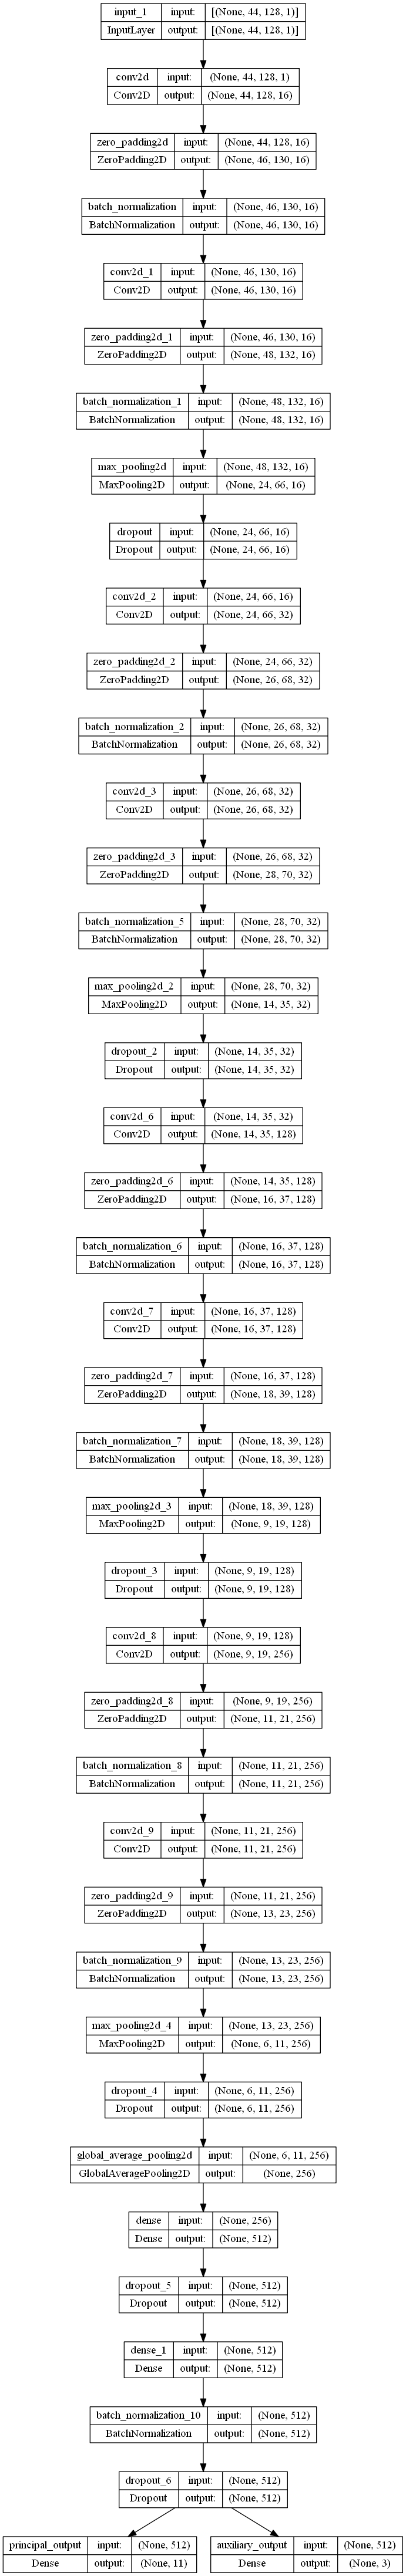

In [30]:
plot_model(model, to_file='MelSpec.png', show_shapes=True, show_layer_names=True)

## Training the Model

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, TensorBoard
from datetime import datetime 

In [32]:
checkpointer = ModelCheckpoint(filepath = 'saved_checkpoints/MelSpec/checkpoint', verbose=1, save_best_only=True, 
                               monitor='val_loss', mode='min', save_weights_only=True)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=35)


reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode='min', patience=10, verbose=1, min_lr=0.00005)


logfile = "MelSpec"
tensorboard = TensorBoard(log_dir="logs\\{}".format(logfile))

start = datetime.now()

trained_model = model.fit(x=X_train, y={"principal_output":y_train, "auxiliary_output":y_train_aux}, batch_size=128, 
          epochs=150, validation_data=(X_validation, {"principal_output":y_validation, "auxiliary_output":y_validation_aux}), 
          callbacks=[checkpointer, early_stop, reduce_lr_on_plateau, tensorboard], verbose=1)


duration = datetime.now() - start

print("Training completed in {}".format(duration))

Epoch 1/150
134/134 [==============================] - ETA: 0s - loss: 3.9553 - principal_output_loss: 2.8029 - auxiliary_output_loss: 1.1524 - principal_output_accuracy: 0.1667 - auxiliary_output_accuracy: 0.5156
Epoch 1: val_loss improved from inf to 3.31700, saving model to saved_checkpoints/MelSpec\checkpoint
134/134 [==============================] - 17s 63ms/step - loss: 3.9553 - principal_output_loss: 2.8029 - auxiliary_output_loss: 1.1524 - principal_output_accuracy: 0.1667 - auxiliary_output_accuracy: 0.5156 - val_loss: 3.3170 - val_principal_output_loss: 2.4256 - val_auxiliary_output_loss: 0.8914 - val_principal_output_accuracy: 0.1504 - val_auxiliary_output_accuracy: 0.5610 - lr: 0.0010
Epoch 2/150
133/134 [============================>.] - ETA: 0s - loss: 2.9815 - principal_output_loss: 2.2170 - auxiliary_output_loss: 0.7645 - principal_output_accuracy: 0.2647 - auxiliary_output_accuracy: 0.6654
Epoch 2: val_loss did not improve from 3.31700
134/134 [=======================

134/134 [==============================] - ETA: 0s - loss: 0.7365 - principal_output_loss: 0.5748 - auxiliary_output_loss: 0.1618 - principal_output_accuracy: 0.8061 - auxiliary_output_accuracy: 0.9398
Epoch 25: val_loss did not improve from 1.40573
134/134 [==============================] - 7s 51ms/step - loss: 0.7365 - principal_output_loss: 0.5748 - auxiliary_output_loss: 0.1618 - principal_output_accuracy: 0.8061 - auxiliary_output_accuracy: 0.9398 - val_loss: 1.8592 - val_principal_output_loss: 1.2841 - val_auxiliary_output_loss: 0.5751 - val_principal_output_accuracy: 0.6458 - val_auxiliary_output_accuracy: 0.8048 - lr: 0.0010
Epoch 26/150
134/134 [==============================] - ETA: 0s - loss: 0.6814 - principal_output_loss: 0.5314 - auxiliary_output_loss: 0.1500 - principal_output_accuracy: 0.8212 - auxiliary_output_accuracy: 0.9428
Epoch 26: val_loss did not improve from 1.40573
134/134 [==============================] - 7s 51ms/step - loss: 0.6814 - principal_output_loss: 

Epoch 38/150
134/134 [==============================] - ETA: 0s - loss: 0.2609 - principal_output_loss: 0.2142 - auxiliary_output_loss: 0.0467 - principal_output_accuracy: 0.9262 - auxiliary_output_accuracy: 0.9833
Epoch 38: val_loss did not improve from 1.40573
134/134 [==============================] - 7s 51ms/step - loss: 0.2609 - principal_output_loss: 0.2142 - auxiliary_output_loss: 0.0467 - principal_output_accuracy: 0.9262 - auxiliary_output_accuracy: 0.9833 - val_loss: 1.7913 - val_principal_output_loss: 1.2553 - val_auxiliary_output_loss: 0.5360 - val_principal_output_accuracy: 0.7157 - val_auxiliary_output_accuracy: 0.8774 - lr: 5.0000e-04
Epoch 39/150
134/134 [==============================] - ETA: 0s - loss: 0.2479 - principal_output_loss: 0.2020 - auxiliary_output_loss: 0.0459 - principal_output_accuracy: 0.9317 - auxiliary_output_accuracy: 0.9847
Epoch 39: val_loss did not improve from 1.40573
134/134 [==============================] - 7s 51ms/step - loss: 0.2479 - princi

134/134 [==============================] - 7s 51ms/step - loss: 0.0836 - principal_output_loss: 0.0698 - auxiliary_output_loss: 0.0137 - principal_output_accuracy: 0.9778 - auxiliary_output_accuracy: 0.9957 - val_loss: 1.5196 - val_principal_output_loss: 1.0744 - val_auxiliary_output_loss: 0.4451 - val_principal_output_accuracy: 0.7886 - val_auxiliary_output_accuracy: 0.9095 - lr: 1.2500e-04
Epoch 63/150
134/134 [==============================] - ETA: 0s - loss: 0.0740 - principal_output_loss: 0.0618 - auxiliary_output_loss: 0.0122 - principal_output_accuracy: 0.9790 - auxiliary_output_accuracy: 0.9961
Epoch 63: val_loss did not improve from 1.37763
134/134 [==============================] - 7s 52ms/step - loss: 0.0740 - principal_output_loss: 0.0618 - auxiliary_output_loss: 0.0122 - principal_output_accuracy: 0.9790 - auxiliary_output_accuracy: 0.9961 - val_loss: 1.6001 - val_principal_output_loss: 1.1269 - val_auxiliary_output_loss: 0.4732 - val_principal_output_accuracy: 0.7813 - va

Epoch 75/150
133/134 [============================>.] - ETA: 0s - loss: 0.0597 - principal_output_loss: 0.0499 - auxiliary_output_loss: 0.0097 - principal_output_accuracy: 0.9840 - auxiliary_output_accuracy: 0.9969
Epoch 75: val_loss did not improve from 1.37763
134/134 [==============================] - 7s 52ms/step - loss: 0.0596 - principal_output_loss: 0.0499 - auxiliary_output_loss: 0.0097 - principal_output_accuracy: 0.9840 - auxiliary_output_accuracy: 0.9969 - val_loss: 1.4998 - val_principal_output_loss: 1.0491 - val_auxiliary_output_loss: 0.4507 - val_principal_output_accuracy: 0.7952 - val_auxiliary_output_accuracy: 0.9129 - lr: 6.2500e-05
Epoch 76/150
134/134 [==============================] - ETA: 0s - loss: 0.0565 - principal_output_loss: 0.0472 - auxiliary_output_loss: 0.0093 - principal_output_accuracy: 0.9853 - auxiliary_output_accuracy: 0.9971
Epoch 76: val_loss did not improve from 1.37763

Epoch 76: ReduceLROnPlateau reducing learning rate to 5e-05.
134/134 [========

In [33]:
model.load_weights('saved_checkpoints/MelSpec/checkpoint')

## Plotting

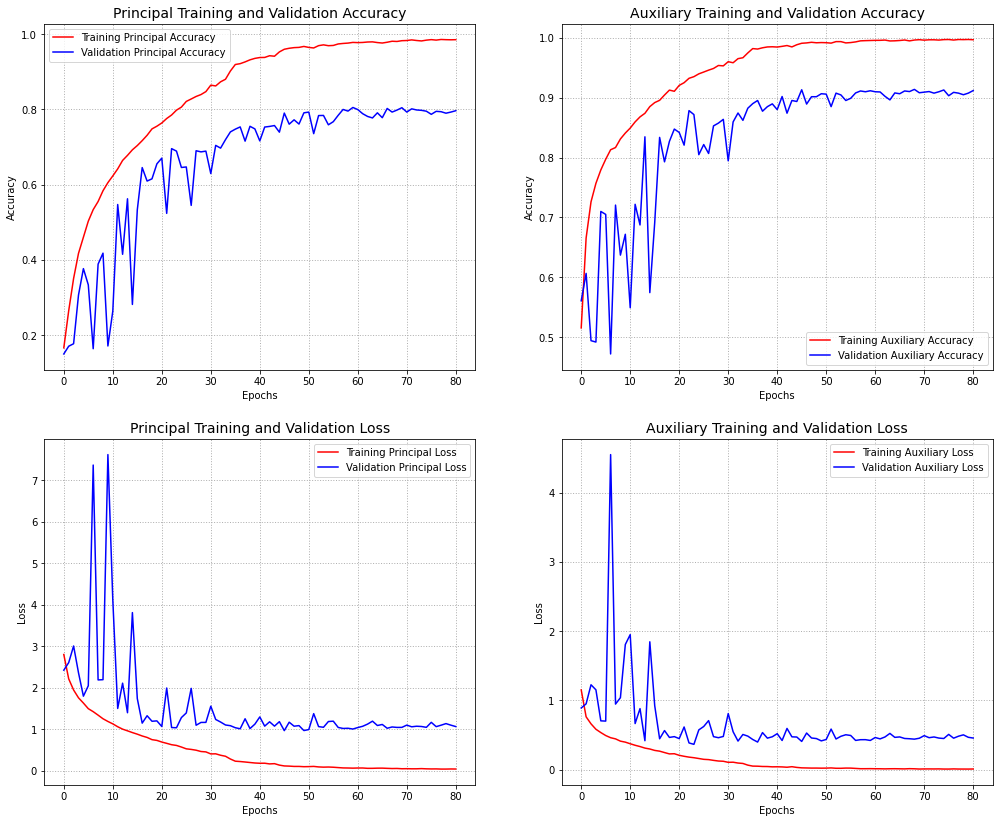

In [34]:
import matplotlib.pyplot as plt

accuracy_1 = trained_model.history['principal_output_accuracy']
accuracy_2 = trained_model.history['auxiliary_output_accuracy']

val_accuracy_1 = trained_model.history['val_principal_output_accuracy']
val_accuracy_2 = trained_model.history['val_auxiliary_output_accuracy']

loss_1 = trained_model.history['principal_output_loss']
loss_2 = trained_model.history['auxiliary_output_loss']

val_loss_1 = trained_model.history['val_principal_output_loss']
val_loss_2 = trained_model.history['val_auxiliary_output_loss']

epochs = list(range(0,81))

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17,14))

ax[0,0].plot(epochs, accuracy_1, 'r', label='Training Principal Accuracy')
ax[0,0].plot(epochs, val_accuracy_1, 'b', label='Validation Principal Accuracy')
ax[0,0].set_title('Principal Training and Validation Accuracy', fontdict={'fontsize':14})
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].legend()
ax[0,0].grid(linestyle='dotted', lw=1)

ax[0,1].plot(epochs, accuracy_2, 'r', label='Training Auxiliary Accuracy')
ax[0,1].plot(epochs, val_accuracy_2, 'b', label='Validation Auxiliary Accuracy')
ax[0,1].set_title('Auxiliary Training and Validation Accuracy', fontdict={'fontsize':14})
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Accuracy')
ax[0,1].legend()
ax[0,1].grid(linestyle='dotted', lw=1)

ax[1,0].plot(epochs, loss_1, 'r', label='Training Principal Loss')
ax[1,0].plot(epochs, val_loss_1, 'b', label='Validation Principal Loss')
ax[1,0].set_title('Principal Training and Validation Loss', fontdict={'fontsize':14})
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Loss')
ax[1,0].legend()
ax[1,0].grid(linestyle='dotted', lw=1)

ax[1,1].plot(epochs, loss_2, 'r', label='Training Auxiliary Loss')
ax[1,1].plot(epochs, val_loss_2, 'b', label='Validation Auxiliary Loss')
ax[1,1].set_title('Auxiliary Training and Validation Loss', fontdict={'fontsize':14})
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('Loss')
ax[1,1].legend()
ax[1,1].grid(linestyle='dotted', lw=1)

## Evaluation on Validation Set

In [35]:
from sklearn.metrics import accuracy_score, log_loss, f1_score, multilabel_confusion_matrix, confusion_matrix, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay

In [36]:
model.evaluate(X_validation,{"principal_output":y_validation, "auxiliary_output":y_validation_aux})

95/95 [==============================] - 1s 9ms/step - loss: 1.3776 - principal_output_loss: 0.9691 - auxiliary_output_loss: 0.4085 - principal_output_accuracy: 0.7903 - auxiliary_output_accuracy: 0.9132


[1.3776347637176514,
 0.9691478610038757,
 0.4084869921207428,
 0.7902584671974182,
 0.913187563419342]

In [37]:
val_predictions =  model.predict(X_validation)[0]

95/95 [==============================] - 1s 8ms/step


In [38]:
val_predictions

array([[2.48240740e-05, 8.02380091e-05, 9.91417764e-05, ...,
        9.07921203e-05, 4.89981612e-04, 9.98444021e-01],
       [5.94838276e-11, 2.46984152e-11, 1.08886837e-10, ...,
        5.69144842e-10, 1.02087595e-10, 1.00000000e+00],
       [1.31298873e-06, 7.83512442e-05, 1.22849026e-03, ...,
        9.98688400e-01, 9.91497700e-07, 4.82999418e-09],
       ...,
       [2.59221650e-07, 9.99678969e-01, 1.57458548e-04, ...,
        2.26149950e-07, 7.79708280e-05, 1.39251970e-08],
       [2.44497845e-04, 1.28953097e-05, 3.72188188e-05, ...,
        1.94092481e-05, 2.05646647e-04, 2.22046292e-05],
       [2.41732923e-03, 1.21094575e-02, 1.61048211e-02, ...,
        1.59136541e-02, 1.92342564e-01, 3.64208631e-02]], dtype=float32)

In [39]:
val_predictions = np.argmax(val_predictions, axis=1)
val_predictions

array([10, 10,  8, ...,  1,  6,  7], dtype=int64)

In [40]:
y_validation = np.argmax(y_validation, axis=1)
y_validation

array([10, 10,  8, ...,  2,  6, 10], dtype=int64)

In [41]:
mapping_dict_2 = {"cel":0, "cla":1, "flu":2, "gac":3, "gel":4, "org":5, "pia":6, "sax":7, "tru":8, "vio":9, "voi":10}

target_classes=[]
for i in mapping_dict_2.keys():
    target_classes.append(i)

In [42]:
#validation data's metrics
print(confusion_matrix(y_validation, val_predictions))
print('\n')
macroF1_1 = precision_recall_fscore_support(y_validation, val_predictions, average='macro')
microF1_1 = precision_recall_fscore_support(y_validation, val_predictions, average='micro')
print("Marco Precision Recall & F1 Scores: {}".format(macroF1_1))
print("Micro Precision Recall & F1 Scores: {}".format(microF1_1))
print("\n")
print(classification_report(y_validation, val_predictions, target_names=target_classes))

[[114   8   8   2   3   1   8   5   0  30   3]
 [  2 159  13   0   2   3   4   9   6   3   1]
 [  4  10 161   3   0   9   2   5   2   6   3]
 [  3   0   4 218  20   3  35   1   0   2   2]
 [  6   6   3   8 268  10   7   8   2   5   9]
 [  0   0   1   1   7 263   4   1   0   3   2]
 [  0   1   3   9   8  12 292   0   3   4   0]
 [ 10  27  11   8  10   6   7 195   9  11   5]
 [  0   4  10   3   3   3   3  12 212   8   0]
 [  9   6   9   6  15   9   3   8   4 191   7]
 [  3   2   3   6  20   7   4   6   1   7 312]]


Marco Precision Recall & F1 Scores: (0.7853106487825392, 0.7823081121657004, 0.7813417860128904, None)
Micro Precision Recall & F1 Scores: (0.790258449304175, 0.790258449304175, 0.7902584493041751, None)


              precision    recall  f1-score   support

         cel       0.75      0.63      0.68       182
         cla       0.71      0.79      0.75       202
         flu       0.71      0.79      0.75       205
         gac       0.83      0.76      0.79       288
   

In [43]:
#train data's metrics

train_data_predictions =  model.predict(X_train)[0]
train_data_predictions = np.argmax(train_data_predictions, axis=1)
y_train = np.argmax(y_train, axis=1)

print(confusion_matrix(y_train, train_data_predictions))
print('\n')
macroF1_2 = precision_recall_fscore_support(y_train, train_data_predictions, average='macro')
microF1_2 = precision_recall_fscore_support(y_train, train_data_predictions, average='micro')
print("Marco Precision Recall & F1 Scores: {}".format(macroF1_2))
print("Micro Precision Recall & F1 Scores: {}".format(microF1_2))
print("\n")
print(classification_report(y_train, train_data_predictions, target_names=target_classes))

535/535 [==============================] - 3s 5ms/step
[[ 976    0    0    0    0    0    0    0    0    6    0]
 [   0 1311    0    0    0    0    0    1    0    1    0]
 [   1    0 1145    0    0    0    0    1    0    1    0]
 [   0    0    0 1595   22    2    4    0    0    0    0]
 [   0    0    0    5 1939    3    1    0    0    0    0]
 [   0    0    0    0    0 1764    0    0    0    0    0]
 [   0    0    0    0    4   11 1816    0    0    0    0]
 [   0    2    2    0    0    0    0 1575    0    0    0]
 [   0    1    1    0    0    0    0    9 1462    0    0]
 [   2    1    3    0    0    0    0    1    0 1466    0]
 [   0    0    0    0    0    0    0    0    1    0 1962]]


Marco Precision Recall & F1 Scores: (0.9951743211593418, 0.9949478679864172, 0.9950502264232962, None)
Micro Precision Recall & F1 Scores: (0.9949698777563315, 0.9949698777563315, 0.9949698777563315, None)


              precision    recall  f1-score   support

         cel       1.00      0.99      1.

## Prediction on Arbitary Length Audio Sample:

In [44]:
from tqdm import tqdm

In [46]:
file_path = "D:\SKDash\IRMAS\Testing\Part1\(02) dont kill the whale-1.wav" #for prediction on arbitary length audio file.
signal, sample_rate = librosa.load(file_path, sr=22050)

final_data = [] #for storing the final data
samples_per_segment = 22050

#normalizing
signal = signal/np.max(signal)

#calculate it's length
(source_rate, source_sig) = wav.read(file_path)
duration_in_seconds = len(source_sig)/float(source_rate)
duration_in_seconds = math.ceil(duration_in_seconds)

temp=[] #storing feature matrices of all segments of a single audio file in a list

for segment in range(duration_in_seconds-1): #we are subtracting 1 coz the last second for most of the files is will not exactly be = 1 sec. So we aren't taking the last second at all into consideration!
    # calculate start and finish sample for current segment
    start = samples_per_segment*segment
    finish = start + samples_per_segment
                        
    # extract features
    feature_vector = mel_spectrogram(signal[start:finish], sr=1024, n_fft=1024, hop_length=512, n_mels=128)                           
    temp.append(feature_vector.tolist())
                                            
final_data.append(temp)

In [47]:
np.array(final_data).shape

(1, 19, 44, 128)

In [48]:
temp=[]

def predict_cluster_number(data):
    for count, i in enumerate(tqdm(data)):  
        for j in i:
            y_pred = np.array(model(np.array(j).reshape((1,44,128,1)))[0]).reshape((11,))
            temp.append(y_pred)
            
        t = np.sum(temp, axis=0) #aggregation of predictions
        t = t/len(temp)
        t = t/np.max(t) #normalization
        prediction = np.argmax(t)
    print("Your data sample belongs to cluster {}".format(prediction))

In [49]:
predict_cluster_number(final_data)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]

Your data sample belongs to cluster 5
